# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


# Preface

1. Reading data.


2. Splitting data.


3. Preprocessing.


    3.1. Preprocessing of Project_subject_categories
    
        3.1.1. On X_train
        3.1.2. On X_cv
        3.1.3. On X_test
        
    3.2. Preprocessing of Project_subject_subcategories
    
        3.2.1. On X_train
        3.2.2. On X_cv
        3.2.3. On X_test

4. Text Preprocessing

    4.1. Preprocessing of Project_Essays
    
        4.1.1. On X_train
        
            4.1.1.1 Word_count in X_train Project_Essays.
            4.1.1.2 Sentiment_Analysis in X_train Project_Essays.
            
        4.1.2. On X_cv
        
            4.1.2.1  Word_count in X_cv Project_Essays.
            4.1.2.2  Sentiment_Analysis in X_cv Project_Essays.
            
        4.1.3. On X_test
        
            4.1.3.1  Word_count in X_test Project_Essays.
            4.1.3.2  Sentiment_Analysis in X_cv Project_Essays.
        
    4.4. Preprocessing of Project_Titles
    
        4.2.1. On X_train
        
            4.2.1.1  Word_count in X_train Project_Titles.
 
        4.2.2. On X_cv
        
            4.2.2.1  Word_count in X_cv Project_Titles.
            
        4.2.3. On X_test
        
            4.2.3.1  Word_count in X_cv Project_Titles.
        
                               

5. Preparing Data for models

    5.1. Vectorizing the categorical data.
    
        5.1.1. School State.
        
            probability scores on X_train for school state w.r.t Positive class(1).
            probability scores on X_train for school state w.r.t Negative class(0).
            Assigning probability scores to X_train.
            Assigning probability scores to X_cv.
            Assigning probability scores to X_test.
            Normalizing the school state values w.r.t Positive class.
            Normalizing the school state values w.r.t Negative class.
        
        5.1.2. Teacher Preifx.
        
            probability scores on X_train for Teacher Prefix w.r.t Positive class(1).
            probability scores on X_train for Teacher Preifx w.r.t Negative class(0).
            Assigning probability scores to X_train.
            Assigning probability scores to X_cv.
            Assigning probability scores to X_test.
            Normalizing the Teacher prefix values w.r.t Positive class.
            Normalizing the Teacher Prefix values w.r.t Negative class.
        
        5.1.3. Project grade category.
        
            probability scores on X_train for Project grade category w.r.t Positive class(1).
            probability scores on X_train for Project grade category w.r.t Negative class(0).
            Assigning probability scores to X_train.
            Assigning probability scores to X_cv.
            Assigning probability scores to X_test.
            Normalizing the Project grade category values w.r.t Positive class.
            Normalizing the Project grade category values w.r.t Negative class.
        
        5.1.4. Clean Categories(subject categories).
        
            probability scores on X_train for Clean Categories w.r.t Positive class(1).
            probability scores on X_train for Clean Categories w.r.t Negative class(0).
            Assigning probability scores to X_train.
            Assigning probability scores to X_cv.
            Assigning probability scores to X_test.
            Normalizing the Clean Categories values w.r.t Positive class.
            Normalizing the Clean Categories values w.r.t Negative class.
        
        5.1.5. Clean Sub_categories(subject sub_categories).
        
            probability scores on X_train for Clean Sub_categories w.r.t Positive class(1).
            probability scores on X_train for Clean Sub_categories w.r.t Negative class(0).
            Assigning probability scores to X_train.
            Assigning probability scores to X_cv.
            Assigning probability scores to X_test.
            Normalizing the Clean Sub_categories values w.r.t Positive class.
            Normalizing the Clean Sub_categoriesvalues w.r.t Negative class.
        
    5.2 Normalizing the Numerical features.
    
        5.2.1. Price.
        
        5.2.2. Teachers Previously Posted.
        
6. Vectorizing the Text data.

    6.1. BoW
    
        6.1.1. BoW on Preprocessed Essays
        
        6.1.2. BoW on Preprocessed Titles
        
    6.2. TFIDF 
    
        6.2.1. TFIDF on Preprocessed Essays
        
        6.2.2. TFIDF on Preprocessed Titles
        
    6.3. AVG W2V 
    
        6.3.1. AVG W2V on Preprocessed Essays.
        
            6.3.1.1. X_train
            6.3.1.2. X_cv
            6.3.1.3. X_Test
            
        6.3.2. AVG W2V on Preprocessed Titles.
        
            6.3.2.1. X_train
            6.3.2.2. X_cv
            6.3.2.3. X_test
            
    6.4. TFIDF weighted W2v
    
        6.4.1. TFIDF_W2V on Preprocessed Essays
        
            6.4.1.1. X_train
            6.4.1.2. X_cv
            6.4.1.3. X_Test
            
        6.4.2. TFIDF_W2V on Preprocessed Titles   
        
            6.4.2.1. X_train
            6.4.2.2. X_cv
            6.4.2.3. X_Test
            
            
7. Merging.

    7.1. Merging w.r.t BoW.
    
    7.2. Merging w.r.t TFIDF.
    
    7.3. Merging w.r.t AVG_W2V.
    
    7.4. Merging w.r.t TFIDF_W2V.
    
    7.5. Merging w.r.t no text features
    
    
8. Applying Logistic Regression

    8.1. Applying Random Forest on BoW, Set-1.
    
    8.2. Applying GBDT on BoW, Set-1.
    
    8.3. Applying Random Forest on TFIDF, Set-2.
    
    8.4. Applying GBDT on TFIDF, Set-2.
    
    8.5. Applying Random Forest on AVG_W2V, Set-3.
    
    8.4. Applying GBDT on AVG_W2v, Set-3.
    
    8.6. Applying Random Forest on TFIDF_W2V, Set-4.
    
    8.6. Applying GBDT on TFIDF_W2V, Set-4.
    
    
9. Conclusions.


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

F:\Newfolder\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1. Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [6]:
resource_data["price"].head(5)

0    149.00
1     14.95
2      8.45
3     13.59
4     24.95
Name: price, dtype: float64

In [7]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [8]:
print(price_data.columns.values)

['id' 'price' 'quantity']


In [9]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [10]:
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

  project_subject_categories            project_subject_subcategories  \
0             Math & Science  Applied Sciences, Health & Life Science   
1              Special Needs                            Special Needs   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects   price  quantity  
0                                            53  725.05         4  
1                                             4  213.03         8

In [11]:
print(project_data['project_grade_category'].unique())

['Grades PreK-2' 'Grades 3-5' 'Grades 9-12' 'Grades 6-8']


In [12]:
project_grade_category = []

for i in range(len(project_data)):
    a = project_data["project_grade_category"][i].replace(" ", "_").replace("-","_")
        
    project_grade_category.append(a)

In [13]:
project_data.drop(['project_grade_category'], axis=1, inplace=True)

In [14]:
project_data["project_grade_category"] = project_grade_category

In [15]:
(project_data['project_grade_category'].unique())

array(['Grades_PreK_2', 'Grades_3_5', 'Grades_9_12', 'Grades_6_8'],
      dtype=object)

In [16]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('none')

In [17]:
X = project_data

##  2. Splitting Data

In [18]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [19]:
X_train.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_subject_categories',
       'project_subject_subcategories', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price',
       'quantity', 'project_grade_category'], dtype=object)

In [20]:
# merge two column text dataframe: 
X_train["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [21]:
X_train.drop(['project_essay_1'], axis=1, inplace=True)
X_train.drop(['project_essay_2'], axis=1, inplace=True)
X_train.drop(['project_essay_3'], axis=1, inplace=True)
X_train.drop(['project_essay_4'], axis=1, inplace=True)

In [22]:
X_train.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_subject_categories',
       'project_subject_subcategories', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price',
       'quantity', 'project_grade_category', 'essay'], dtype=object)

In [23]:
# merge two column text dataframe: 
X_cv["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [24]:

X_cv.drop(['project_essay_1'], axis=1, inplace=True)
X_cv.drop(['project_essay_2'], axis=1, inplace=True)
X_cv.drop(['project_essay_3'], axis=1, inplace=True)
X_cv.drop(['project_essay_4'], axis=1, inplace=True)

In [25]:
X_cv.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_subject_categories',
       'project_subject_subcategories', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price',
       'quantity', 'project_grade_category', 'essay'], dtype=object)

In [26]:
# merge two column text dataframe: 
X_test["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [27]:
X_test.drop(['project_essay_1'], axis=1, inplace=True)
X_test.drop(['project_essay_2'], axis=1, inplace=True)
X_test.drop(['project_essay_3'], axis=1, inplace=True)
X_test.drop(['project_essay_4'], axis=1, inplace=True)

In [28]:
X_test.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_subject_categories',
       'project_subject_subcategories', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price',
       'quantity', 'project_grade_category', 'essay'], dtype=object)

## 3. Preprocessing

### 3.1 preprocessing of `project_subject_categories`

### 3.1.1  On X_train

In [29]:
catogories = list(X_train['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    
    cat_list.append(temp.strip())
    
X_train['clean_categories'] = cat_list
X_train.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_train['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
X_train_sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


### 3.1.2 On X_cv

In [30]:
catogories = list(X_cv['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_cv['clean_categories'] = cat_list
X_cv.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_cv['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
X_cv_sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

### 3.1.3 On X_test

In [31]:
catogories = list(X_test['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_test['clean_categories'] = cat_list
X_test.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_cv['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
X_test_sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

## 3.2 preprocessing of `project_subject_subcategories`

### 3.2.1 On X_train

In [32]:
sub_catogories = list(X_train['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_train['clean_subcategories'] = sub_cat_list
X_train.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_train['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
X_train_sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

### 3.2.2 On X_cv

In [33]:
sub_catogories = list(X_cv['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_cv['clean_subcategories'] = sub_cat_list
X_cv.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_train['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
X_cv_sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

### 3.2.2 On X_test

In [34]:
sub_catogories = list(X_test['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_test['clean_subcategories'] = sub_cat_list
X_test.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_train['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
X_test_sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 4. Text preprocessing

In [35]:
X_train.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
20393        3324  p121520  09e247e9b0d22faea1f79dfa307c2464           Mrs.   
23215       85721  p176332  bd8c9c6b131441ff024e5310b448f2d3           Mrs.   

      school_state                Date                   project_title  \
20393           MS 2016-08-01 16:10:37  Bouncing Down the Road of Life   
23215           CA 2016-08-04 15:36:09             Hands-on Technology   

                                project_resource_summary  \
20393  My students need 25 Bouncy Bands to help them ...   
23215  My students need four Osmo Genius Kits - Multi...   

       teacher_number_of_previously_posted_projects   price  quantity  \
20393                                             0   12.71        25   
23215                                             1  428.15         6   

      project_grade_category  \
20393             Grades_6_8   
23215          Grades_PreK_2   

                                                   essay  \
20393  My students are at an age where their role in ...   
23215  My students come from very diverse backgrounds...   

              clean_categories     clean_subcategories  
20393        Literacy_Language      Literature_Writing  
23215  Math_Science Music_Arts  Mathematics VisualArts

In [36]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [37]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [38]:
sent = decontracted(X_train['essay'].values[20000])
print(sent)
print("="*50)

Junipero Serra High School is a comprehensive high school in the Tierrasanta community of the city of San Diego. It is part of the San Diego Unified School District and serves over 1,750 students from very diverse ethnic and social-economic backgrounds.\r\n\r\nThe Music Department at Junipero Serra High School currently serves over 130 students. It is composed of three distinct programs: the Band Program, the Orchestra Program, and the Choral Program. It offers instruction on all woodwind, brass, string, and percussion instruments in addition to teaching proper vocal (singing) technique.Currently, the students in our Orchestra Program at Junipero Serra High School are playing on very worn and low quality strings that do not match their skill level. We also have several bows that need to be replaced since the ribbons of hair on them are very thin and overused. Together, these two situations are preventing our wonderful orchestra students from producing the beautiful sounds that their ph

In [39]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Junipero Serra High School is a comprehensive high school in the Tierrasanta community of the city of San Diego It is part of the San Diego Unified School District and serves over 1 750 students from very diverse ethnic and social economic backgrounds r n r nThe Music Department at Junipero Serra High School currently serves over 130 students It is composed of three distinct programs the Band Program the Orchestra Program and the Choral Program It offers instruction on all woodwind brass string and percussion instruments in addition to teaching proper vocal singing technique Currently the students in our Orchestra Program at Junipero Serra High School are playing on very worn and low quality strings that do not match their skill level We also have several bows that need to be replaced since the ribbons of hair on them are very thin and overused Together these two situations are preventing our wonderful orchestra students from producing the beautiful sounds that their physical and creat

In [40]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

<h2><font color='red'> 4.1 Preprocessing of `project_essays`</font></h2>

###  4.1.1 On X_train

In [41]:
# Combining all the above stundents 
from tqdm import tqdm
X_train_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    X_train_preprocessed_essays.append(sent.lower().strip())

100%|██████████| 49041/49041 [00:45<00:00, 1080.91it/s]


In [42]:
# after preprocesing
X_train_preprocessed_essays[20000]

'junipero serra high school comprehensive high school tierrasanta community city san diego part san diego unified school district serves 1 750 students diverse ethnic social economic backgrounds music department junipero serra high school currently serves 130 students composed three distinct programs band program orchestra program choral program offers instruction woodwind brass string percussion instruments addition teaching proper vocal singing technique currently students orchestra program junipero serra high school playing worn low quality strings not match skill level also several bows need replaced since ribbons hair thin overused together two situations preventing wonderful orchestra students producing beautiful sounds physical creative abilities allow bows strings listed project students string orchestra able fully express read perform quality works literature make mental connections assist not music classroom across courses including math science world language history please 

### 4.1.1.1 Word_count in X_train Project_Essays

In [43]:
Q = X_train_preprocessed_essays.copy()

In [44]:
Word_count_X_train_Essays = []

for i in Q:
    n = len(i.split())
    Word_count_X_train_Essays.append(n)

In [45]:
print(Word_count_X_train_Essays[2000])
print(len(Word_count_X_train_Essays))

118
49041


In [46]:
Word_count_X_train_Essays = np.asarray(Word_count_X_train_Essays)
print(Word_count_X_train_Essays.shape)

(49041,)


### 4.1.1.2 Sentiment_Analysis on X_train Project_Essays

In [47]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\B511
[nltk_data]     I7\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [48]:
Q = X_train_preprocessed_essays.copy()

In [49]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

cls = SentimentIntensityAnalyzer()

Positive_X_train_Essays = []
Negative_X_train_Essays = []
Neutral_X_train_Essays = []
Compound_X_train_Essays = []

for i in tqdm(Q):
    n1= cls.polarity_scores(i)["neg"]
    n2= cls.polarity_scores(i)["pos"]
    n3= cls.polarity_scores(i)["neu"]
    n4= cls.polarity_scores(i)["compound"]
    Positive_X_train_Essays.append(n1)
    Negative_X_train_Essays.append(n2)
    Neutral_X_train_Essays.append(n3)
    Compound_X_train_Essays.append(n4)
    


F:\Newfolder\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.

100%|██████████| 49041/49041 [09:04<00:00, 90.04it/s] 


In [50]:
print(Positive_X_train_Essays[20000])
print(Negative_X_train_Essays[20000])
print(Neutral_X_train_Essays[20000])
print(Compound_X_train_Essays[20000])

0.034
0.193
0.774
0.9735


In [51]:
Positive_X_train_Essays = np.asarray(Positive_X_train_Essays)
Negative_X_train_Essays = np.asarray(Negative_X_train_Essays)
Neutral_X_train_Essays = np.asarray(Neutral_X_train_Essays)
Compound_X_train_Essays = np.asarray(Compound_X_train_Essays)
print(Neutral_X_train_Essays.shape)

(49041,)


In [52]:
import numpy as np
Sentiment_X_train_Essays = np.column_stack((Positive_X_train_Essays,Negative_X_train_Essays,Neutral_X_train_Essays,Compound_X_train_Essays))
print(Sentiment_X_train_Essays.shape)

(49041, 4)


### 4.1.2 On X_cv

In [53]:
# Combining all the above stundents 
from tqdm import tqdm
X_cv_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    X_cv_preprocessed_essays.append(sent.lower().strip())

100%|██████████| 24155/24155 [00:19<00:00, 1249.77it/s]


In [54]:
# after preprocesing
X_cv_preprocessed_essays[20000]

'students special needs range intellectual disabilities speech language impairments autism sweet group kids come school every day eager learn come across district school hosts program district hard time sitting still due adhd autism developmental delays students not let disabilities hold back anything love learn love coming school students need variety puppets props help encourage storytelling telling boost comprehension students able practice fluency read scripts aloud use puppets tell exciting story help boost student confidence help make stronger readers students 3 4 years grade level often become discouraged dislike reading want show bring reading alive make fun want bring reading alive show students magical reading nannan'

### 4.1.2.1 Word_count in X_cv Project_Essays

In [55]:
Q = X_cv_preprocessed_essays.copy()

In [56]:
Word_count_X_cv_Essays = []

for i in Q:
    n = len(i.split())
    Word_count_X_cv_Essays.append(n)

In [57]:
print(Word_count_X_cv_Essays[20000])
print(len(Word_count_X_cv_Essays))

105
24155


In [58]:
Word_count_X_cv_Essays = np.asarray(Word_count_X_cv_Essays)
print(Word_count_X_cv_Essays.shape)

(24155,)


### 4.1.2.2 Sentiment_analysis on X_cv Project_Essays

In [59]:
Q = X_cv_preprocessed_essays.copy()

In [60]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

cls = SentimentIntensityAnalyzer()

Positive_X_cv_Essays = []
Negative_X_cv_Essays = []
Neutral_X_cv_Essays = []
Compound_X_cv_Essays = []

for i in tqdm(Q):
    n1= cls.polarity_scores(i)["neg"]
    n2= cls.polarity_scores(i)["pos"]
    n3= cls.polarity_scores(i)["neu"]
    n4= cls.polarity_scores(i)["compound"]
    Positive_X_cv_Essays.append(n1)
    Negative_X_cv_Essays.append(n2)
    Neutral_X_cv_Essays.append(n3)
    Compound_X_cv_Essays.append(n4)

100%|██████████| 24155/24155 [04:22<00:00, 92.17it/s] 


In [61]:
print(Positive_X_cv_Essays[20000])
print(Negative_X_cv_Essays[20000])
print(Neutral_X_cv_Essays[20000])
print(Compound_X_cv_Essays[20000])

0.047
0.396
0.557
0.9933


In [62]:
Positive_X_cv_Essays = np.asarray(Positive_X_cv_Essays)
Negative_X_cv_Essays = np.asarray(Negative_X_cv_Essays)
Neutral_X_cv_Essays = np.asarray(Neutral_X_cv_Essays)
Compound_X_cv_Essays = np.asarray(Compound_X_cv_Essays)
print(Neutral_X_cv_Essays.shape)

(24155,)


In [63]:
import numpy as np
Sentiment_X_cv_Essays = np.column_stack((Positive_X_cv_Essays,Negative_X_cv_Essays,Neutral_X_cv_Essays,Compound_X_cv_Essays))
print(Sentiment_X_cv_Essays.shape)

(24155, 4)


###  4.1.3 On X_test

In [64]:
# merge two column text dataframe: 
X_test["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [65]:
# Combining all the above stundents 
from tqdm import tqdm
X_test_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    X_test_preprocessed_essays.append(sent.lower().strip())

100%|██████████| 36052/36052 [00:30<00:00, 1180.77it/s]


### 4.1.3.1  Word_count in X_test Project_Essays

In [66]:
Q = X_test_preprocessed_essays.copy()

In [67]:
Word_count_X_test_Essays = []

for i in Q:
    n = len(i.split())
    Word_count_X_test_Essays.append(n)

In [68]:
print(len(Word_count_X_test_Essays))

36052


In [69]:
Word_count_X_test_Essays = np.asarray(Word_count_X_test_Essays)
print(Word_count_X_test_Essays.shape)

(36052,)


### 4.1.2.3 Sentiment_analysis on X_test Project_Essays

In [70]:
Q = X_test_preprocessed_essays.copy()

In [71]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

cls = SentimentIntensityAnalyzer()

Positive_X_test_Essays = []
Negative_X_test_Essays = []
Neutral_X_test_Essays = []
Compound_X_test_Essays = []

for i in tqdm(Q):
    n1= cls.polarity_scores(i)["neg"]
    n2= cls.polarity_scores(i)["pos"]
    n3= cls.polarity_scores(i)["neu"]
    n4= cls.polarity_scores(i)["compound"]
    Positive_X_test_Essays.append(n1)
    Negative_X_test_Essays.append(n2)
    Neutral_X_test_Essays.append(n3)
    Compound_X_test_Essays.append(n4)

100%|██████████| 36052/36052 [06:35<00:00, 59.29it/s] 


In [72]:
Positive_X_test_Essays = np.asarray(Positive_X_test_Essays)
Negative_X_test_Essays = np.asarray(Negative_X_test_Essays)
Neutral_X_test_Essays = np.asarray(Neutral_X_test_Essays)
Compound_X_test_Essays = np.asarray(Compound_X_test_Essays)
print(Neutral_X_test_Essays.shape)

(36052,)


In [73]:
import numpy as np
Sentiment_X_test_Essays = np.column_stack((Positive_X_test_Essays,Negative_X_test_Essays,Neutral_X_test_Essays,Compound_X_test_Essays))
print(Sentiment_X_test_Essays.shape)

(36052, 4)


<h2><font color='red'> 4.2 Preprocessing of `project_title`</font></h2>

###  4.2.1 On X_train

In [74]:
# Combining all the above statemennts 
from tqdm import tqdm
X_train_preprocessed_project_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    X_train_preprocessed_project_titles.append(sent.lower().strip())

100%|██████████| 49041/49041 [00:01<00:00, 25550.03it/s]


In [75]:
X_train_preprocessed_project_titles[10000]

'personalized learning 1 1 chromebooks'

### 4.2.1.1 Word_count in X_train Project_titles

In [76]:
Q = X_train_preprocessed_project_titles.copy()

In [77]:
Word_count_X_train_titles = []

for i in Q:
    n = len(i.split())
    Word_count_X_train_titles.append(n)

In [78]:
print(Word_count_X_train_titles[10000])
Word_count_X_train_titles = np.asarray(Word_count_X_train_titles)
print(Word_count_X_train_titles.shape)

5
(49041,)


In [79]:
import numpy as np
Word_count_X_train_Essays_titles = np.column_stack((Word_count_X_train_Essays,Word_count_X_train_titles))
print(Word_count_X_train_Essays_titles.shape)

(49041, 2)


### 4.2.2 On X_cv

In [80]:
# Combining all the above statemennts 
from tqdm import tqdm
X_cv_preprocessed_project_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    X_cv_preprocessed_project_titles.append(sent.lower().strip())

100%|██████████| 24155/24155 [00:00<00:00, 29174.12it/s]


In [81]:
X_cv_preprocessed_project_titles[10000]

'supplys to help students'

### 4.2.2.1 Word_count in X_cv Project_Titles

In [82]:
Q = X_cv_preprocessed_project_titles.copy()

In [83]:
Word_count_X_cv_titles = []

for i in Q:
    n = len(i.split())
    Word_count_X_cv_titles.append(n)

In [84]:
print(Word_count_X_cv_titles[10000])
Word_count_X_cv_titles = np.asarray(Word_count_X_cv_titles)
print(Word_count_X_cv_titles.shape)

4
(24155,)


In [85]:
import numpy as np
Word_count_X_cv_Essays_titles = np.column_stack((Word_count_X_cv_Essays,Word_count_X_cv_titles))
print(Word_count_X_cv_Essays_titles.shape)

(24155, 2)


### 4.2.3 On X_test

In [86]:
# Combining all the above statemennts 
from tqdm import tqdm
X_test_preprocessed_project_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    X_test_preprocessed_project_titles.append(sent.lower().strip())

100%|██████████| 36052/36052 [00:01<00:00, 28439.75it/s]


In [87]:
X_test_preprocessed_project_titles[10000]

'aprendiendo espanol learning spanish'

### 4.2.2.1 Word_count in X_test Project_Titles

In [88]:
Q = X_test_preprocessed_project_titles.copy()

In [89]:
Word_count_X_test_titles = []

for i in Q:
    n = len(i.split())
    Word_count_X_test_titles.append(n)

In [90]:
print(Word_count_X_test_titles[10000])
Word_count_X_test_titles = np.asarray(Word_count_X_test_titles)
print(Word_count_X_test_titles.shape)

4
(36052,)


In [91]:
import numpy as np
Word_count_X_test_Essays_titles = np.column_stack((Word_count_X_test_Essays,Word_count_X_test_titles))
print(Word_count_X_test_Essays_titles.shape)

(36052, 2)


## 5 Preparing data for models

In [92]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price', 'quantity',
       'project_grade_category'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 5.1 Vectorizing Categorical data

In [95]:
X_train_positive_index = []

for i in range(len(y_train)):
    if (y_train[i] == 1):
        X_train_positive_index.append(i)

In [96]:
X_train_negative_index = []

for i in range(len(y_train)):
    if (y_train[i] == 0):
        X_train_negative_index.append(i)

In [97]:
print(len(X_train_negative_index))
print(len(X_train_positive_index))

7426
41615


### 5.1.1 School State

In [98]:
n = pd.DataFrame(X_train["school_state"])
X_train_school_postive_index = n.iloc[X_train_positive_index,:]
print(X_train_school_postive_index.shape)


(41615, 1)


In [99]:
school_state_positive = {}
#accumulating all the values in school state whose projects were  approved
for i in X_train_school_postive_index["school_state"]:
    if i not in school_state_positive :
        school_state_positive[i] = 1
    else :
        school_state_positive[i] += 1

In [100]:
print(school_state_positive)

{'MS': 501, 'CA': 5827, 'IN': 983, 'OR': 480, 'NC': 1909, 'DE': 142, 'ID': 247, 'NH': 140, 'MO': 1014, 'IL': 1650, 'UT': 657, 'FL': 2310, 'PA': 1208, 'NY': 2917, 'NJ': 819, 'MI': 1163, 'MN': 462, 'GA': 1513, 'CT': 654, 'TX': 2696, 'KS': 222, 'OH': 981, 'AZ': 802, 'LA': 913, 'NV': 539, 'WI': 700, 'MA': 918, 'WA': 901, 'AL': 658, 'AR': 378, 'VA': 771, 'SC': 1605, 'MD': 568, 'KY': 495, 'TN': 672, 'OK': 842, 'RI': 112, 'ND': 63, 'HI': 202, 'NM': 217, 'IA': 271, 'CO': 429, 'SD': 97, 'NE': 121, 'WV': 204, 'ME': 170, 'WY': 34, 'DC': 183, 'AK': 128, 'MT': 98, 'VT': 29}


In [101]:
n = pd.DataFrame(X_train["school_state"])
X_train_school_negative_index = n.iloc[X_train_negative_index,:]
print(X_train_school_negative_index.shape)

(7426, 1)


In [102]:
school_state_negative = {}
#accumulating all the values in school state whose projects were not approved
for i in X_train_school_negative_index["school_state"]:
    if i not in school_state_negative :
        school_state_negative[i] = 1
    else :
        school_state_negative[i] += 1

In [103]:
print(school_state_negative)

{'MS': 90, 'FL': 457, 'MD': 103, 'TX': 632, 'ME': 40, 'LA': 193, 'PA': 226, 'GA': 291, 'CA': 970, 'CO': 82, 'MI': 210, 'AL': 97, 'MO': 177, 'IL': 271, 'OH': 130, 'UT': 134, 'AZ': 153, 'OK': 170, 'NV': 97, 'SC': 237, 'NY': 487, 'OR': 73, 'WI': 124, 'HI': 31, 'AR': 78, 'NC': 308, 'IN': 177, 'ID': 54, 'VT': 11, 'CT': 100, 'MA': 169, 'TN': 120, 'AK': 22, 'NE': 24, 'VA': 142, 'RI': 22, 'WV': 36, 'MT': 21, 'WA': 129, 'KY': 71, 'IA': 46, 'NJ': 145, 'KS': 40, 'NM': 37, 'DC': 39, 'MN': 83, 'NH': 18, 'SD': 20, 'DE': 22, 'WY': 9, 'ND': 8}


In [104]:
school_state_total = {}

for a in X_train['school_state'] :
    if a not in school_state_total :
        school_state_total[a] = 1
    else :
        school_state_total[a] += 1

In [105]:
print(school_state_total)

{'MS': 591, 'CA': 6797, 'IN': 1160, 'OR': 553, 'NC': 2217, 'DE': 164, 'ID': 301, 'NH': 158, 'MO': 1191, 'IL': 1921, 'FL': 2767, 'UT': 791, 'MD': 671, 'PA': 1434, 'NY': 3404, 'NJ': 964, 'TX': 3328, 'MI': 1373, 'MN': 545, 'GA': 1804, 'ME': 210, 'LA': 1106, 'CT': 754, 'KS': 262, 'OH': 1111, 'AZ': 955, 'CO': 511, 'NV': 636, 'WI': 824, 'MA': 1087, 'WA': 1030, 'AL': 755, 'AR': 456, 'VA': 913, 'SC': 1842, 'KY': 566, 'TN': 792, 'OK': 1012, 'RI': 134, 'ND': 71, 'HI': 233, 'NM': 254, 'IA': 317, 'VT': 40, 'SD': 117, 'AK': 150, 'NE': 145, 'WV': 240, 'MT': 119, 'WY': 43, 'DC': 222}


In [106]:
overall_school_state_sum = sum(school_state_total.values())

In [107]:
print(overall_school_state_sum)

49041


### 5.1.1.1 Probability Scores w.r.t Postive Class(1)

In [108]:
print(len(X_train_positive_index))

41615


In [109]:
positive_school_state_probability = {}

for state in school_state_total.keys():
    positive_school_state_probability[state] = (school_state_positive[state])/len(X_train_positive_index)

In [110]:
print(positive_school_state_probability.items())

dict_items([('MS', 0.012038928271056109), ('CA', 0.1400216268172534), ('IN', 0.02362129040009612), ('OR', 0.011534302535143579), ('NC', 0.04587288237414394), ('DE', 0.0034122311666466417), ('ID', 0.005935359846209299), ('NH', 0.00336417157275021), ('MO', 0.024366214105490808), ('IL', 0.03964916496455605), ('FL', 0.05550883095037847), ('UT', 0.015787576594977773), ('MD', 0.013648924666586567), ('PA', 0.029027994713444673), ('NY', 0.07009491769794546), ('NJ', 0.01968040370058873), ('TX', 0.06478433257238976), ('MI', 0.02794665385077496), ('MN', 0.011101766190075694), ('GA', 0.036357082782650485), ('ME', 0.004085065481196684), ('LA', 0.021939204613721015), ('CT', 0.015715487204133124), ('KS', 0.0053346149225039045), ('OH', 0.023573230806199687), ('AZ', 0.01927189715246906), ('CO', 0.010308782890784574), ('NV', 0.01295206055508831), ('WI', 0.01682085786375105), ('MA', 0.022059353598462093), ('WA', 0.021650847050342426), ('AL', 0.015811606391925987), ('AR', 0.009083263246425567), ('VA', 0.0

In [111]:
for k,v in positive_school_state_probability.items():
    positive_school_state_probability[k]= round(v,5)

In [112]:
print(positive_school_state_probability)

{'MS': 0.01204, 'CA': 0.14002, 'IN': 0.02362, 'OR': 0.01153, 'NC': 0.04587, 'DE': 0.00341, 'ID': 0.00594, 'NH': 0.00336, 'MO': 0.02437, 'IL': 0.03965, 'FL': 0.05551, 'UT': 0.01579, 'MD': 0.01365, 'PA': 0.02903, 'NY': 0.07009, 'NJ': 0.01968, 'TX': 0.06478, 'MI': 0.02795, 'MN': 0.0111, 'GA': 0.03636, 'ME': 0.00409, 'LA': 0.02194, 'CT': 0.01572, 'KS': 0.00533, 'OH': 0.02357, 'AZ': 0.01927, 'CO': 0.01031, 'NV': 0.01295, 'WI': 0.01682, 'MA': 0.02206, 'WA': 0.02165, 'AL': 0.01581, 'AR': 0.00908, 'VA': 0.01853, 'SC': 0.03857, 'KY': 0.01189, 'TN': 0.01615, 'OK': 0.02023, 'RI': 0.00269, 'ND': 0.00151, 'HI': 0.00485, 'NM': 0.00521, 'IA': 0.00651, 'VT': 0.0007, 'SD': 0.00233, 'AK': 0.00308, 'NE': 0.00291, 'WV': 0.0049, 'MT': 0.00235, 'WY': 0.00082, 'DC': 0.0044}


### 5.1.1.2 Probability Scores w.r.t Negative Class(0)

In [113]:
negative_school_state_probability = {}

for state in school_state_total.keys():
    negative_school_state_probability[state] = (school_state_negative[state])/len(X_train_negative_index)

In [114]:
for k,v in negative_school_state_probability.items():
    negative_school_state_probability[k]= round(v,5)

In [115]:
print(negative_school_state_probability)

{'MS': 0.01212, 'CA': 0.13062, 'IN': 0.02384, 'OR': 0.00983, 'NC': 0.04148, 'DE': 0.00296, 'ID': 0.00727, 'NH': 0.00242, 'MO': 0.02384, 'IL': 0.03649, 'FL': 0.06154, 'UT': 0.01804, 'MD': 0.01387, 'PA': 0.03043, 'NY': 0.06558, 'NJ': 0.01953, 'TX': 0.08511, 'MI': 0.02828, 'MN': 0.01118, 'GA': 0.03919, 'ME': 0.00539, 'LA': 0.02599, 'CT': 0.01347, 'KS': 0.00539, 'OH': 0.01751, 'AZ': 0.0206, 'CO': 0.01104, 'NV': 0.01306, 'WI': 0.0167, 'MA': 0.02276, 'WA': 0.01737, 'AL': 0.01306, 'AR': 0.0105, 'VA': 0.01912, 'SC': 0.03191, 'KY': 0.00956, 'TN': 0.01616, 'OK': 0.02289, 'RI': 0.00296, 'ND': 0.00108, 'HI': 0.00417, 'NM': 0.00498, 'IA': 0.00619, 'VT': 0.00148, 'SD': 0.00269, 'AK': 0.00296, 'NE': 0.00323, 'WV': 0.00485, 'MT': 0.00283, 'WY': 0.00121, 'DC': 0.00525}


### Assigning School_state Probability scores to X_train

In [116]:
school_state_positive1_probabilities = []
school_state_negative0_probabilities = []

for a in X_train["school_state"] :
    school_state_positive1_probabilities.append(positive_school_state_probability[a])
    school_state_negative0_probabilities.append(negative_school_state_probability[a])

In [117]:
print(len(school_state_positive1_probabilities))
print(len(school_state_negative0_probabilities))

49041
49041


In [118]:
X_train["school_state_0"] = school_state_negative0_probabilities
X_train["school_state_1"] = school_state_positive1_probabilities
print(len(X_train["school_state_1"]))

49041


### Assigning School_state Probability scores to X_cv

In [119]:
school_state_positive1_probabilities_cv = []
school_state_negative0_probabilities_cv = []

for a in X_cv["school_state"] :
    school_state_positive1_probabilities_cv.append(positive_school_state_probability[a])
    school_state_negative0_probabilities_cv.append(negative_school_state_probability[a])

In [120]:
print(len(school_state_positive1_probabilities_cv))
print(len(school_state_negative0_probabilities_cv))

24155
24155


In [121]:
X_cv["school_state_0"] = school_state_negative0_probabilities_cv
X_cv["school_state_1"] = school_state_positive1_probabilities_cv

### Assigning School_state Probability scores to X_test

In [122]:
school_state_positive1_probabilities_test = []
school_state_negative0_probabilities_test = []

for a in X_test["school_state"] :
    school_state_positive1_probabilities_test.append(positive_school_state_probability[a])
    school_state_negative0_probabilities_test.append(negative_school_state_probability[a])

In [123]:
print(len(school_state_positive1_probabilities_test))
print(len(school_state_negative0_probabilities_test))

36052
36052


In [124]:
X_test["school_state_0"] = school_state_negative0_probabilities_test
X_test["school_state_1"] = school_state_positive1_probabilities_test
print(len(X_test["school_state_1"]))

36052


In [125]:
print(X_test.columns.values)

['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state' 'Date'
 'project_title' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'price' 'quantity'
 'project_grade_category' 'essay' 'clean_categories' 'clean_subcategories'
 'school_state_0' 'school_state_1']


### Normalizing the school_state values w.r.t postive class

In [126]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['school_state_1'].values.reshape(1,-1))

X_train_school_state_1 = normalizer.transform(X_train['school_state_1'].values.reshape(1,-1))
X_cv_school_state_1 = normalizer.transform(X_cv['school_state_1'].values.reshape(1,-1))
X_test_school_state_1 = normalizer.transform(X_test['school_state_1'].values.reshape(1,-1))

X_train_school_state_1 = (X_train_school_state_1).T
X_cv_school_state_1 = (X_cv_school_state_1).T
X_test_school_state_1 = (X_test_school_state_1).T

print("After vectorizations")
print(X_train_school_state_1.shape)
print(X_cv_school_state_1.shape)
print(X_test_school_state_1.shape)
print("="*100)

After vectorizations
(49041, 1)
(24155, 1)
(36052, 1)


### Normalizing School_state w.r.t Negative values

In [127]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['school_state_0'].values.reshape(1,-1))

X_train_school_state_0 = normalizer.transform(X_train['school_state_0'].values.reshape(1,-1))
X_cv_school_state_0 = normalizer.transform(X_cv['school_state_0'].values.reshape(1,-1))
X_test_school_state_0 = normalizer.transform(X_test['school_state_0'].values.reshape(1,-1))

X_train_school_state_0 = (X_train_school_state_0).T
X_cv_school_state_0 = (X_cv_school_state_0).T
X_test_school_state_0 = (X_test_school_state_0).T

print("After vectorizations")
print(X_train_school_state_0.shape)
print(X_cv_school_state_0.shape)
print(X_test_school_state_0.shape)
print("="*100)

After vectorizations
(49041, 1)
(24155, 1)
(36052, 1)


### 5.1.2 Teacher Prefix

In [128]:
n = pd.DataFrame(X_train["teacher_prefix"].astype("U"))
X_train_teacher_prefix_postive_index = n.iloc[X_train_positive_index,:]
print(X_train_teacher_prefix_postive_index.shape)

(41615, 1)


In [129]:
teacher_prefix_positive = {}
#accumulating all the values in school state whose projects were  approved
for i in (X_train_teacher_prefix_postive_index["teacher_prefix"].astype("U")):
    if i not in teacher_prefix_positive :
        teacher_prefix_positive[i] = 1
    else :
        teacher_prefix_positive[i] += 1

In [130]:
print(len(X_train_positive_index))

41615


In [131]:
print(teacher_prefix_positive)

{'Mrs.': 21903, 'Ms.': 14733, 'Mr.': 4075, 'Teacher': 897, 'Dr.': 5, 'none': 2}


In [132]:
n = pd.DataFrame(X_train["teacher_prefix"].astype("U"))
X_train_teacher_prefix_negative_index = n.iloc[X_train_negative_index,:]
print(X_train_teacher_prefix_negative_index.shape)

(7426, 1)


In [133]:
teacher_prefix_negative = {}
#accumulating all the values in school state whose projects were  approved
for i in X_train_teacher_prefix_negative_index["teacher_prefix"]:
    if i not in teacher_prefix_negative :
        teacher_prefix_negative[i] = 1
    else :
        teacher_prefix_negative[i] += 1

In [134]:
teacher_prefix_negative["none"]=1

In [135]:
print(teacher_prefix_negative)

{'Mr.': 749, 'Ms.': 2749, 'Mrs.': 3712, 'Teacher': 214, 'Dr.': 2, 'none': 1}


In [136]:
teacher_prefix_total = {}

for a in X_train['teacher_prefix'] :
    if a not in teacher_prefix_total :
        teacher_prefix_total[a] = 1
    else :
        teacher_prefix_total[a] += 1

In [137]:
print(teacher_prefix_total)

{'Mrs.': 25615, 'Ms.': 17482, 'Mr.': 4824, 'Teacher': 1111, 'Dr.': 7, 'none': 2}


### 5.1.2.1 Probability Scores w.r.t Postive Class(1)

In [138]:
positive_teacher_prefix_probability = {}

for prefix in teacher_prefix_total.keys():
    positive_teacher_prefix_probability[prefix] = (teacher_prefix_positive[prefix])/(len(X_train_positive_index))

In [139]:
for k,v in positive_teacher_prefix_probability.items():
    positive_teacher_prefix_probability[k]= round(v,5)

In [140]:
print(positive_teacher_prefix_probability)

{'Mrs.': 0.52632, 'Ms.': 0.35403, 'Mr.': 0.09792, 'Teacher': 0.02155, 'Dr.': 0.00012, 'none': 5e-05}


### 5.1.2.2 Probability Scores w.r.t Negative Class(1)

In [141]:
negative_teacher_prefix_probability = {}

for prefix in teacher_prefix_total.keys():
        negative_teacher_prefix_probability[prefix] = ((teacher_prefix_negative[prefix])/(len(X_train_negative_index)))


In [142]:
for k,v in negative_teacher_prefix_probability.items():
    negative_teacher_prefix_probability[k]= round(v,5)

In [143]:
print(negative_teacher_prefix_probability)

{'Mrs.': 0.49987, 'Ms.': 0.37019, 'Mr.': 0.10086, 'Teacher': 0.02882, 'Dr.': 0.00027, 'none': 0.00013}


### 5.1.2.3 Appending Teacher_prefix to X_train

In [144]:
teacher_prefix_positive1_probabilities = []
teacher_prefix_negative0_probabilities = []

for a in X_train["teacher_prefix"] :
    teacher_prefix_positive1_probabilities.append(positive_teacher_prefix_probability[a])
    teacher_prefix_negative0_probabilities.append(negative_teacher_prefix_probability[a])

In [145]:
print(len(teacher_prefix_positive1_probabilities))
print(len(teacher_prefix_negative0_probabilities))

49041
49041


In [146]:
X_train["teacher_prefix_0"] = teacher_prefix_positive1_probabilities
X_train["teacher_prefix_1"] = teacher_prefix_negative0_probabilities

In [147]:
print(X_train.columns.values)

['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state' 'Date'
 'project_title' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'price' 'quantity'
 'project_grade_category' 'essay' 'clean_categories' 'clean_subcategories'
 'school_state_0' 'school_state_1' 'teacher_prefix_0' 'teacher_prefix_1']


### 5.1.2.4 Appending Teacher_prefix to X_cv

In [148]:
teacher_prefix_positive1_probabilities_cv= []
teacher_prefix_negative0_probabilities_cv = []

for a in X_cv["teacher_prefix"] :
    teacher_prefix_positive1_probabilities_cv.append(positive_teacher_prefix_probability[a])
    teacher_prefix_negative0_probabilities_cv.append(negative_teacher_prefix_probability[a])

In [149]:
X_cv["teacher_prefix_0"] = teacher_prefix_negative0_probabilities_cv
X_cv["teacher_prefix_1"] = teacher_prefix_positive1_probabilities_cv

In [150]:
print(X_cv.columns.values)

['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state' 'Date'
 'project_title' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'price' 'quantity'
 'project_grade_category' 'essay' 'clean_categories' 'clean_subcategories'
 'school_state_0' 'school_state_1' 'teacher_prefix_0' 'teacher_prefix_1']


### 5.1.2.4 Appending Teacher_prefix to X_test

In [151]:
teacher_prefix_positive1_probabilities_test = []
teacher_prefix_negative0_probabilities_test = []

for a in X_test["teacher_prefix"] :
    teacher_prefix_positive1_probabilities_test.append(positive_teacher_prefix_probability[a])
    teacher_prefix_negative0_probabilities_test.append(negative_teacher_prefix_probability[a])

In [152]:
X_test["teacher_prefix_0"] = teacher_prefix_negative0_probabilities_test
X_test["teacher_prefix_1"] = teacher_prefix_positive1_probabilities_test

### Normalizing Teacher_prefix w.r.t Positive class

In [153]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['teacher_prefix_1'].values.reshape(1,-1))

X_train_teacher_prefix_1 = normalizer.transform(X_train['teacher_prefix_1'].values.reshape(1,-1))
X_cv_teacher_prefix_1  = normalizer.transform(X_cv['teacher_prefix_1'].values.reshape(1,-1))
X_test_teacher_prefix_1  = normalizer.transform(X_test['teacher_prefix_1'].values.reshape(1,-1))

X_train_teacher_prefix_1  = (X_train_teacher_prefix_1 ).T
X_cv_teacher_prefix_1 = (X_cv_teacher_prefix_1 ).T
X_test_teacher_prefix_1  = (X_test_teacher_prefix_1 ).T

print("After vectorizations")
print(X_train_teacher_prefix_1.shape)
print(X_cv_teacher_prefix_1.shape)
print(X_test_teacher_prefix_1.shape)
print("="*100)

After vectorizations
(49041, 1)
(24155, 1)
(36052, 1)


### Nomalizing Teacher_prefix w.r.t Negative class

In [154]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['teacher_prefix_0'].values.reshape(1,-1))

X_train_teacher_prefix_0 = normalizer.transform(X_train['teacher_prefix_0'].values.reshape(1,-1))
X_cv_teacher_prefix_0  = normalizer.transform(X_cv['teacher_prefix_0'].values.reshape(1,-1))
X_test_teacher_prefix_0  = normalizer.transform(X_test['teacher_prefix_0'].values.reshape(1,-1))

X_train_teacher_prefix_0  = (X_train_teacher_prefix_0 ).T
X_cv_teacher_prefix_0 = (X_cv_teacher_prefix_0 ).T
X_test_teacher_prefix_0  = (X_test_teacher_prefix_0 ).T

print("After vectorizations")
print(X_train_teacher_prefix_0.shape)
print(X_cv_teacher_prefix_0.shape)
print(X_test_teacher_prefix_0.shape)
print("="*100)

After vectorizations
(49041, 1)
(24155, 1)
(36052, 1)


### 5.1.3 Project_grade_category

In [155]:
n = pd.DataFrame(X_train["project_grade_category"])
X_train_grade_category_postive_index = n.iloc[X_train_positive_index,:]
print(X_train_grade_category_postive_index.shape)


(41615, 1)


In [156]:
grade_category_positive = {}
#accumulating all the values in school state whose projects were  approved
for i in X_train_grade_category_postive_index["project_grade_category"]:
    if i not in grade_category_positive :
        grade_category_positive[i] = 1
    else :
        grade_category_positive[i] += 1

In [157]:
print(grade_category_positive)

{'Grades_6_8': 6394, 'Grades_PreK_2': 16827, 'Grades_3_5': 14245, 'Grades_9_12': 4149}


In [158]:
n = pd.DataFrame(X_train["project_grade_category"])
X_train_grade_category_negative_index = n.iloc[X_train_negative_index,:]
print(X_train_grade_category_negative_index.shape)

(7426, 1)


In [159]:
grade_category_negative = {}
#accumulating all the values in school state whose projects were  approved
for i in X_train_grade_category_negative_index["project_grade_category"]:
    if i not in grade_category_negative :
        grade_category_negative[i] = 1
    else :
        grade_category_negative[i] += 1

In [160]:
print(grade_category_negative)

{'Grades_9_12': 785, 'Grades_3_5': 2395, 'Grades_6_8': 1218, 'Grades_PreK_2': 3028}


In [161]:
grade_category_total = {}

for a in X_train['project_grade_category'] :
    if a not in grade_category_total :
        grade_category_total[a] = 1
    else :
        grade_category_total[a] += 1

In [162]:
print(grade_category_total)

{'Grades_6_8': 7612, 'Grades_PreK_2': 19855, 'Grades_3_5': 16640, 'Grades_9_12': 4934}


### 5.1.1.1 Probability Scores w.r.t Postive Class(1) project_grade_category

In [163]:
positive_grade_category_probability = {}

for grade in grade_category_total.keys():
    positive_grade_category_probability[grade] = (grade_category_positive[grade])/(len(X_train_positive_index))

In [164]:
for k,v in positive_grade_category_probability.items():
    positive_grade_category_probability[k]= round(v,5)

In [165]:
print(positive_grade_category_probability)

{'Grades_6_8': 0.15365, 'Grades_PreK_2': 0.40435, 'Grades_3_5': 0.3423, 'Grades_9_12': 0.0997}


### 5.1.1.1 Probability Scores w.r.t Negative Class(0) project_grade_category

In [166]:
negative_grade_category_probability = {}

for grade in grade_category_total.keys():
    negative_grade_category_probability[grade] = (grade_category_negative[grade])/(len(X_train_negative_index))

In [167]:
for k,v in negative_grade_category_probability.items():
    negative_grade_category_probability[k]= round(v,5)

In [168]:
print(negative_grade_category_probability)

{'Grades_6_8': 0.16402, 'Grades_PreK_2': 0.40776, 'Grades_3_5': 0.32252, 'Grades_9_12': 0.10571}


### Appending Project_grade_category Probability scores to X_train

In [169]:
grade_category_positive1_probabilities = []
grade_category_negative0_probabilities = []

for a in X_train["project_grade_category"] :
    grade_category_positive1_probabilities.append(positive_grade_category_probability[a])
    grade_category_negative0_probabilities.append(negative_grade_category_probability[a])

In [170]:
X_train["grade_category_1"] = grade_category_positive1_probabilities
X_train["grade_category_0"] = grade_category_negative0_probabilities

### Appending Project_grade_category Probability scores to X_cv

In [171]:
grade_category_positive1_probabilities_cv = []
grade_category_negative0_probabilities_cv = []

for a in X_cv["project_grade_category"] :
    grade_category_positive1_probabilities_cv.append(positive_grade_category_probability[a])
    grade_category_negative0_probabilities_cv.append(negative_grade_category_probability[a])

In [172]:
print(len(grade_category_positive1_probabilities_cv))

24155


In [173]:
X_cv["grade_category_1"] = grade_category_positive1_probabilities_cv
X_cv["grade_category_0"] = grade_category_negative0_probabilities_cv

### Appending Project_grade_category Probability scores to X_test

In [174]:
grade_category_positive1_probabilities_test = []
grade_category_negative0_probabilities_test = []

for a in X_test["project_grade_category"] :
    grade_category_positive1_probabilities_test.append(positive_grade_category_probability[a])
    grade_category_negative0_probabilities_test.append(negative_grade_category_probability[a])

In [175]:
print(len(grade_category_positive1_probabilities_test))

36052


In [176]:
X_test["grade_category_1"] = grade_category_positive1_probabilities_test
X_test["grade_category_0"] = grade_category_negative0_probabilities_test

In [177]:
print(X_train.columns.values)

['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state' 'Date'
 'project_title' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'price' 'quantity'
 'project_grade_category' 'essay' 'clean_categories' 'clean_subcategories'
 'school_state_0' 'school_state_1' 'teacher_prefix_0' 'teacher_prefix_1'
 'grade_category_1' 'grade_category_0']


### Normalizing grade_category w.r.t postive class

In [178]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['grade_category_1'].values.reshape(1,-1))

X_train_grade_category_1 = normalizer.transform(X_train['grade_category_1'].values.reshape(1,-1))
X_cv_grade_category_1  = normalizer.transform(X_cv['grade_category_1'].values.reshape(1,-1))
X_test_grade_category_1  = normalizer.transform(X_test['grade_category_1'].values.reshape(1,-1))

X_train_grade_category_1  = (X_train_grade_category_1 ).T
X_cv_grade_category_1 = (X_cv_grade_category_1 ).T
X_test_grade_category_1  = (X_test_grade_category_1 ).T

print("After vectorizations")
print(X_train_grade_category_1.shape)
print(X_cv_grade_category_1.shape)
print(X_test_grade_category_1.shape)
print("="*100)

After vectorizations
(49041, 1)
(24155, 1)
(36052, 1)


### Normalizing grade category w.r.t Negative Class

In [179]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['grade_category_0'].values.reshape(1,-1))

X_train_grade_category_0 = normalizer.transform(X_train['grade_category_0'].values.reshape(1,-1))
X_cv_grade_category_0  = normalizer.transform(X_cv['grade_category_0'].values.reshape(1,-1))
X_test_grade_category_0  = normalizer.transform(X_test['grade_category_0'].values.reshape(1,-1))

X_train_grade_category_0  = (X_train_grade_category_0 ).T
X_cv_grade_category_0 = (X_cv_grade_category_0 ).T
X_test_grade_category_0  = (X_test_grade_category_0 ).T

print("After vectorizations")
print(X_train_grade_category_0.shape)
print(X_cv_grade_category_0.shape)
print(X_test_grade_category_0.shape)
print("="*100)

After vectorizations
(49041, 1)
(24155, 1)
(36052, 1)


### 5.1.4  Clean Categories

In [180]:
n = pd.DataFrame(X_train["clean_categories"])
X_train_clean_category_postive_index = n.iloc[X_train_positive_index,:]
print(X_train_clean_category_postive_index.shape)

(41615, 1)


In [181]:
clean_category_positive = {}
#accumulating all the values in school state whose projects were  approved
for i in X_train_clean_category_postive_index["clean_categories"]:
    if i not in clean_category_positive :
        
        clean_category_positive[i] = 1
    else :
        clean_category_positive[i] += 1

In [182]:
for i in X_train["clean_categories"]:
    if i not in clean_category_positive:
        clean_category_positive[i]=1

In [183]:
print(clean_category_positive)

{'Literacy_Language': 9276, 'Math_Science Music_Arts': 586, 'Math_Science': 6279, 'AppliedLearning Literacy_Language': 803, 'AppliedLearning': 1379, 'Literacy_Language Music_Arts': 681, 'Warmth Care_Hunger': 563, 'History_Civics Literacy_Language': 540, 'Music_Arts': 1965, 'Math_Science Literacy_Language': 884, 'Literacy_Language Math_Science': 5715, 'Health_Sports': 3907, 'Literacy_Language SpecialNeeds': 1496, 'Literacy_Language History_Civics': 320, 'Math_Science SpecialNeeds': 693, 'Math_Science History_Civics': 253, 'SpecialNeeds': 1550, 'AppliedLearning SpecialNeeds': 567, 'AppliedLearning Music_Arts': 245, 'Literacy_Language AppliedLearning': 262, 'Health_Sports Literacy_Language': 313, 'AppliedLearning Math_Science': 382, 'SpecialNeeds Music_Arts': 106, 'Health_Sports SpecialNeeds': 545, 'History_Civics': 703, 'History_Civics Music_Arts': 113, 'Math_Science AppliedLearning': 449, 'History_Civics Health_Sports': 7, 'AppliedLearning Health_Sports': 221, 'AppliedLearning History_C

In [184]:
n = pd.DataFrame(X_train["clean_categories"])
X_train_clean_category_negative_index = n.iloc[X_train_negative_index,:]
print(X_train_clean_category_negative_index.shape)

(7426, 1)


In [185]:
clean_category_negative = {}
#accumulating all the values in school state whose projects were  approved
for i in X_train_clean_category_negative_index["clean_categories"]:
    if i not in clean_category_negative :
        
        clean_category_negative[i] = 1
    else :
        clean_category_negative[i] += 1

In [186]:
for i in X_train["clean_categories"]:
    if i not in clean_category_negative:
        clean_category_negative[i]=1

In [187]:
print(clean_category_negative)

{'AppliedLearning': 307, 'Literacy_Language': 1393, 'Math_Science Literacy_Language': 145, 'Math_Science': 1383, 'AppliedLearning SpecialNeeds': 122, 'Literacy_Language Math_Science': 905, 'AppliedLearning Literacy_Language': 122, 'Health_Sports': 657, 'Math_Science History_Civics': 50, 'Music_Arts': 327, 'Literacy_Language Music_Arts': 140, 'Literacy_Language SpecialNeeds': 275, 'Math_Science Music_Arts': 133, 'History_Civics': 137, 'Health_Sports SpecialNeeds': 78, 'History_Civics SpecialNeeds': 19, 'Math_Science SpecialNeeds': 145, 'Health_Sports Math_Science': 23, 'SpecialNeeds': 347, 'Literacy_Language AppliedLearning': 38, 'History_Civics Math_Science': 23, 'AppliedLearning History_Civics': 14, 'Math_Science AppliedLearning': 87, 'Health_Sports Literacy_Language': 53, 'AppliedLearning Math_Science': 80, 'Literacy_Language Health_Sports': 8, 'AppliedLearning Health_Sports': 46, 'AppliedLearning Music_Arts': 65, 'Literacy_Language History_Civics': 49, 'History_Civics Literacy_Langu

In [188]:
clean_category_total = {}

for a in X_train['clean_categories']:
    if a not in clean_category_total :
        clean_category_total[a] = 1
    else :
        clean_category_total[a] += 1

### 5.1.1.1 Probability Scores w.r.t Postive Class(1)

In [189]:
positive_clean_category_probability = {}

for cat in clean_category_total.keys():
    positive_clean_category_probability[cat] = (clean_category_positive[cat])/(len(X_train_positive_index))

In [190]:
print(positive_clean_category_probability)

{'Literacy_Language': 0.22290039649164964, 'Math_Science Music_Arts': 0.014081461011654452, 'Math_Science': 0.15088309503784694, 'AppliedLearning Literacy_Language': 0.01929592694941728, 'AppliedLearning': 0.03313708999158957, 'Literacy_Language Music_Arts': 0.016364291721734953, 'Warmth Care_Hunger': 0.013528775681845488, 'History_Civics Literacy_Language': 0.012976090352036526, 'Music_Arts': 0.04721855100324402, 'Math_Science Literacy_Language': 0.021242340502222755, 'Literacy_Language Math_Science': 0.13733028955905321, 'Health_Sports': 0.09388441667667909, 'Literacy_Language SpecialNeeds': 0.03594857623453082, 'Literacy_Language History_Civics': 0.007689535023429052, 'Math_Science SpecialNeeds': 0.016652649285113542, 'AppliedLearning SpecialNeeds': 0.013624894869638351, 'Math_Science History_Civics': 0.006079538627898594, 'SpecialNeeds': 0.03724618526973447, 'AppliedLearning Music_Arts': 0.005887300252312868, 'Literacy_Language AppliedLearning': 0.006295806800432536, 'Health_Sports

In [191]:
for k,v in positive_clean_category_probability.items():
    positive_clean_category_probability[k]= round(v,5)

In [192]:
print(positive_clean_category_probability)

{'Literacy_Language': 0.2229, 'Math_Science Music_Arts': 0.01408, 'Math_Science': 0.15088, 'AppliedLearning Literacy_Language': 0.0193, 'AppliedLearning': 0.03314, 'Literacy_Language Music_Arts': 0.01636, 'Warmth Care_Hunger': 0.01353, 'History_Civics Literacy_Language': 0.01298, 'Music_Arts': 0.04722, 'Math_Science Literacy_Language': 0.02124, 'Literacy_Language Math_Science': 0.13733, 'Health_Sports': 0.09388, 'Literacy_Language SpecialNeeds': 0.03595, 'Literacy_Language History_Civics': 0.00769, 'Math_Science SpecialNeeds': 0.01665, 'AppliedLearning SpecialNeeds': 0.01362, 'Math_Science History_Civics': 0.00608, 'SpecialNeeds': 0.03725, 'AppliedLearning Music_Arts': 0.00589, 'Literacy_Language AppliedLearning': 0.0063, 'Health_Sports Literacy_Language': 0.00752, 'AppliedLearning Math_Science': 0.00918, 'SpecialNeeds Music_Arts': 0.00255, 'Health_Sports SpecialNeeds': 0.0131, 'History_Civics': 0.01689, 'History_Civics Music_Arts': 0.00272, 'Math_Science AppliedLearning': 0.01079, 'Hi

### 5.1.1.2 Probability Scores w.r.t Negative Class(0)

In [193]:
negative_clean_category_probability = {}

for cat in clean_category_total.keys():
    negative_clean_category_probability[cat] = (clean_category_negative[cat])/(len(X_train_negative_index))

In [194]:
for k,v in negative_clean_category_probability.items():
    negative_clean_category_probability[k]= round(v,5)

In [195]:
print(negative_clean_category_probability)

{'Literacy_Language': 0.18758, 'Math_Science Music_Arts': 0.01791, 'Math_Science': 0.18624, 'AppliedLearning Literacy_Language': 0.01643, 'AppliedLearning': 0.04134, 'Literacy_Language Music_Arts': 0.01885, 'Warmth Care_Hunger': 0.00593, 'History_Civics Literacy_Language': 0.00768, 'Music_Arts': 0.04403, 'Math_Science Literacy_Language': 0.01953, 'Literacy_Language Math_Science': 0.12187, 'Health_Sports': 0.08847, 'Literacy_Language SpecialNeeds': 0.03703, 'Literacy_Language History_Civics': 0.0066, 'Math_Science SpecialNeeds': 0.01953, 'AppliedLearning SpecialNeeds': 0.01643, 'Math_Science History_Civics': 0.00673, 'SpecialNeeds': 0.04673, 'AppliedLearning Music_Arts': 0.00875, 'Literacy_Language AppliedLearning': 0.00512, 'Health_Sports Literacy_Language': 0.00714, 'AppliedLearning Math_Science': 0.01077, 'SpecialNeeds Music_Arts': 0.0035, 'Health_Sports SpecialNeeds': 0.0105, 'History_Civics': 0.01845, 'History_Civics Music_Arts': 0.00337, 'Math_Science AppliedLearning': 0.01172, 'H

### Appending clean_categories Probability scores to X_train

In [196]:
clean_category_positive1_probabilities = []
clean_category_negative0_probabilities = []

for a in X_train["clean_categories"] :
    clean_category_positive1_probabilities.append(positive_clean_category_probability[a])
    clean_category_negative0_probabilities.append(negative_clean_category_probability[a])

In [197]:
print(len(clean_category_positive1_probabilities))

49041


In [198]:
X_train["clean_category_0"] = clean_category_negative0_probabilities
X_train["clean_category_1"] = clean_category_positive1_probabilities

### Appending clean_categories Probability scores to X_cv

In [199]:
clean_category_positive1_probabilities_cv = []
clean_category_negative0_probabilities_cv = []

for a in X_cv["clean_categories"] :
    if a in X_cv["clean_categories"]:
        clean_category_positive1_probabilities_cv.append(positive_clean_category_probability[a])
        clean_category_negative0_probabilities_cv.append(negative_clean_category_probability[a])
    else:
        clean_category_positive1_probabilities_cv.append(0.00001)
        clean_category_negative0_probabilities_cv.append(0.00001)

In [200]:
print(len(clean_category_positive1_probabilities_cv))
print(len(clean_category_negative0_probabilities_cv))

24155
24155


In [201]:
X_cv["clean_category_0"] = clean_category_negative0_probabilities_cv
X_cv["clean_category_1"] = clean_category_positive1_probabilities_cv

### Appending clean_categories Probability scores to X_test

In [202]:
clean_category_positive1_probabilities_test = []
clean_category_negative0_probabilities_test = []

for a in X_test["clean_categories"] :
    if a in X_test["clean_categories"]:
        clean_category_positive1_probabilities_test.append(positive_clean_category_probability[a])
        clean_category_negative0_probabilities_test.append(negative_clean_category_probability[a])
    else:
        clean_category_negative0_probabilities_test.append(0.00001)
        clean_category_positive1_probabilities_test.append(0.00001)

In [203]:
print(len(clean_category_positive1_probabilities_test))

36052


In [204]:
X_test["clean_category_0"] = clean_category_negative0_probabilities_test
X_test["clean_category_1"] = clean_category_positive1_probabilities_test

In [205]:
print(X_test.columns.values)

['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state' 'Date'
 'project_title' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'price' 'quantity'
 'project_grade_category' 'essay' 'clean_categories' 'clean_subcategories'
 'school_state_0' 'school_state_1' 'teacher_prefix_0' 'teacher_prefix_1'
 'grade_category_1' 'grade_category_0' 'clean_category_0'
 'clean_category_1']


### Nomalizing clean_categories w.r.t positive class

In [206]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['clean_category_1'].values.reshape(1,-1))

X_train_clean_category_1 = normalizer.transform(X_train['clean_category_1'].values.reshape(1,-1))
X_cv_clean_category_1  = normalizer.transform(X_cv['clean_category_1'].values.reshape(1,-1))
X_test_clean_category_1  = normalizer.transform(X_test['clean_category_1'].values.reshape(1,-1))

X_train_clean_category_1  = (X_train_clean_category_1 ).T
X_cv_clean_category_1 = (X_cv_clean_category_1 ).T
X_test_clean_category_1 = (X_test_clean_category_1 ).T

print("After vectorizations")
print(X_train_clean_category_1.shape)
print(X_cv_clean_category_1.shape)
print(X_test_clean_category_1.shape)
print("="*100)

After vectorizations
(49041, 1)
(24155, 1)
(36052, 1)


In [207]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['clean_category_0'].values.reshape(1,-1))

X_train_clean_category_0 = normalizer.transform(X_train['clean_category_0'].values.reshape(1,-1))
X_cv_clean_category_0  = normalizer.transform(X_cv['clean_category_0'].values.reshape(1,-1))
X_test_clean_category_0  = normalizer.transform(X_test['clean_category_0'].values.reshape(1,-1))

X_train_clean_category_0  = (X_train_clean_category_0 ).T
X_cv_clean_category_0 = (X_cv_clean_category_0 ).T
X_test_clean_category_0 = (X_test_clean_category_0 ).T

print("After vectorizations")
print(X_train_clean_category_0.shape)
print(X_cv_clean_category_0.shape)
print(X_test_clean_category_0.shape)
print("="*100)

After vectorizations
(49041, 1)
(24155, 1)
(36052, 1)


### 5.1.5 Clean subcategories

In [208]:
n = pd.DataFrame(X_train["clean_subcategories"])
X_train_clean_subcategory_postive_index = n.iloc[X_train_positive_index,:]
print(X_train_clean_subcategory_postive_index.shape)

(41615, 1)


In [209]:
clean_subcategory_positive = {}
#accumulating all the values in school state whose projects were  approved
for i in X_train_clean_subcategory_postive_index["clean_subcategories"]:
    
    if i not in clean_subcategory_positive :
        clean_subcategory_positive[i] = 1
    else :
        clean_subcategory_positive[i] += 1

In [210]:
for i in X_train["clean_subcategories"]:
    if i not in clean_subcategory_positive:
        clean_subcategory_positive[i]=1

In [211]:
n = pd.DataFrame(X_train["clean_subcategories"])
X_train_clean_subcategory_negative_index = n.iloc[X_train_negative_index,:]
print(X_train_clean_subcategory_negative_index.shape)

(7426, 1)


In [212]:
clean_subcategory_negative = {}
#accumulating all the values in school state whose projects were  approved
for i in X_train_clean_subcategory_negative_index["clean_subcategories"]:
    
    if i not in clean_subcategory_negative :
        clean_subcategory_negative[i] = 1
    else :
        clean_subcategory_negative[i] += 1

In [213]:
for i in X_train["clean_subcategories"]:
    if i not in clean_subcategory_negative:
        clean_subcategory_negative[i]=1

In [214]:
clean_subcategory_total = {}

for a in X_train['clean_subcategories'] :
    if a not in clean_subcategory_total :
        clean_subcategory_total[a] = 1
    else :
        clean_subcategory_total[a] += 1

In [215]:
print(len(clean_subcategory_total))

376


### 5.1.1.1 Probability Scores w.r.t Postive Class(1)

In [216]:
positive_clean_subcategory_probability = {}

for sub in clean_subcategory_total.keys():
    positive_clean_subcategory_probability[sub] = (clean_subcategory_positive[sub])/(len(X_train_positive_index))

In [217]:
for k,v in positive_clean_subcategory_probability.items():
    positive_clean_subcategory_probability[k]= round(v,5)

In [218]:
print(len(positive_clean_subcategory_probability))

376


### Probability scores w.r.t Negative Class

In [219]:
negative_clean_subcategory_probability = {}

for sub in clean_subcategory_total.keys():
    negative_clean_subcategory_probability[sub] = (clean_subcategory_negative[sub])/(len(X_train_positive_index))

In [220]:
for k,v in negative_clean_subcategory_probability.items():
    negative_clean_subcategory_probability[k]= round(v,5)

In [221]:
print(len(negative_clean_subcategory_probability))

376


### Assigning probability scores to X_train

In [222]:
clean_subcategory_positive1_probabilities = []
clean_subcategory_negative0_probabilities = []

for a in X_train["clean_subcategories"]:
    clean_subcategory_positive1_probabilities.append(positive_clean_subcategory_probability[a])
    clean_subcategory_negative0_probabilities.append(negative_clean_subcategory_probability[a])

In [223]:
print(len(clean_subcategory_positive1_probabilities))
print(len(clean_subcategory_negative0_probabilities))

49041
49041


In [224]:
X_train["clean_subcategory_0"] = clean_subcategory_negative0_probabilities
X_train["clean_subcategory_1"] = clean_subcategory_positive1_probabilities

### Assigning probability scores to X_cv

In [225]:
for a in X_cv["clean_subcategories"]:
    if a not in X_train["clean_subcategories"]:
        positive_clean_subcategory_probability[a] = 0.00001
        negative_clean_subcategory_probability[a] = 0.00001

In [226]:
clean_subcategory_positive1_probabilities_cv = []
clean_subcategory_negative0_probabilities_cv = []

for a in X_cv["clean_subcategories"]:
    clean_subcategory_positive1_probabilities_cv.append(positive_clean_subcategory_probability[a])
    clean_subcategory_negative0_probabilities_cv.append(negative_clean_subcategory_probability[a])

In [227]:
X_cv["clean_subcategory_0"] = clean_subcategory_negative0_probabilities_cv
X_cv["clean_subcategory_1"] = clean_subcategory_positive1_probabilities_cv

### Assigning probability scores to X_test

In [228]:
for a in X_test["clean_subcategories"]:
    if a not in X_train["clean_subcategories"]:
        positive_clean_subcategory_probability[a] = 0.00001
        negative_clean_subcategory_probability[a] = 0.00001

In [229]:
clean_subcategory_positive1_probabilities_test = []
clean_subcategory_negative0_probabilities_test = []

for a in X_test["clean_subcategories"]:
    clean_subcategory_positive1_probabilities_test.append(positive_clean_subcategory_probability[a])
    clean_subcategory_negative0_probabilities_test.append(negative_clean_subcategory_probability[a])

In [230]:
X_test["clean_subcategory_0"] = clean_subcategory_negative0_probabilities_test
X_test["clean_subcategory_1"] = clean_subcategory_positive1_probabilities_test

### Nomalizing clean_subcategories w.r.t Positve Class

In [231]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['clean_subcategory_1'].values.reshape(1,-1))

X_train_clean_subcategory_1 = normalizer.transform(X_train['clean_subcategory_1'].values.reshape(1,-1))
X_cv_clean_subcategory_1  = normalizer.transform(X_cv['clean_subcategory_1'].values.reshape(1,-1))
X_test_clean_subcategory_1  = normalizer.transform(X_test['clean_subcategory_1'].values.reshape(1,-1))

X_train_clean_subcategory_1  = (X_train_clean_subcategory_1 ).T
X_cv_clean_subcategory_1 = (X_cv_clean_subcategory_1 ).T
X_test_clean_subcategory_1 = (X_test_clean_subcategory_1 ).T

print("After vectorizations")
print(X_train_clean_subcategory_1.shape)
print(X_cv_clean_subcategory_1.shape)
print(X_test_clean_subcategory_1.shape)
print("="*100)

After vectorizations
(49041, 1)
(24155, 1)
(36052, 1)


### Nomalizing clean_subcategories w.r.t Negative Class

In [232]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['clean_subcategory_0'].values.reshape(1,-1))

X_train_clean_subcategory_0 = normalizer.transform(X_train['clean_subcategory_0'].values.reshape(1,-1))
X_cv_clean_subcategory_0  = normalizer.transform(X_cv['clean_subcategory_0'].values.reshape(1,-1))
X_test_clean_subcategory_0  = normalizer.transform(X_test['clean_subcategory_0'].values.reshape(1,-1))

X_train_clean_subcategory_0  = (X_train_clean_subcategory_0 ).T
X_cv_clean_subcategory_0 = (X_cv_clean_subcategory_0 ).T
X_test_clean_subcategory_0 = (X_test_clean_subcategory_0 ).T

print("After vectorizations")
print(X_train_clean_subcategory_0.shape)
print(X_cv_clean_subcategory_0.shape)
print(X_test_clean_subcategory_0.shape)
print("="*100)

After vectorizations
(49041, 1)
(24155, 1)
(36052, 1)


### 5.2 Vectorizing the Numerical Features

### 5.2.1 Price

In [233]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape)
print(X_cv_price_norm.shape)
print(X_test_price_norm.shape)
print("="*100)

After vectorizations
(49041, 1)
(24155, 1)
(36052, 1)


### 5.2.2 Teacher no previously posted

In [234]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_teacher_no_prev_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_teacher_no_prev_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_no_prev_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_teacher_no_prev_norm.shape)
print(X_cv_teacher_no_prev_norm.shape)
print(X_test_teacher_no_prev_norm.shape)
print("="*100)

After vectorizations
(49041, 1)
(24155, 1)
(36052, 1)


### 5.2.3 Quantity

In [235]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['quantity'].values.reshape(-1,1))

X_train_quantity = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
X_cv_quantity = normalizer.transform(X_cv['quantity'].values.reshape(-1,1))
X_test_quantity = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_teacher_no_prev_norm.shape)
print(X_cv_teacher_no_prev_norm.shape)
print(X_test_teacher_no_prev_norm.shape)
print("="*100)

After vectorizations
(49041, 1)
(24155, 1)
(36052, 1)


In [236]:
X_train.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_title', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price',
       'quantity', 'project_grade_category', 'essay', 'clean_categories',
       'clean_subcategories', 'school_state_0', 'school_state_1',
       'teacher_prefix_0', 'teacher_prefix_1', 'grade_category_1',
       'grade_category_0', 'clean_category_0', 'clean_category_1',
       'clean_subcategory_0', 'clean_subcategory_1'], dtype=object)

## 6. Vectorizing Text data

### 6.1 Bag of words (Bigrams with degree of freedom =10 and max_features =5000)

### 6.1.1 BoW On Prepocessed Esssays

In [237]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
X_train_essay_text_bow = vectorizer.fit_transform(X_train_preprocessed_essays)
X_cv_essay_text_bow = vectorizer.transform(X_cv_preprocessed_essays)
X_test_essay_text_bow = vectorizer.transform(X_test_preprocessed_essays)

print("Shape of matrix after one hot encodig ",X_train_essay_text_bow.shape)
print("Shape of matrix after one hot encodig ",X_cv_essay_text_bow.shape)
print("Shape of matrix after one hot encodig ",X_test_essay_text_bow.shape)

Shape of matrix after one hot encodig  (49041, 12094)
Shape of matrix after one hot encodig  (24155, 12094)
Shape of matrix after one hot encodig  (36052, 12094)


### 6.1.2 BoW on Prepocessed titles

In [238]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
X_train_title_text_bow = vectorizer.fit_transform(X_train_preprocessed_project_titles)
X_cv_title_text_bow = vectorizer.transform(X_cv_preprocessed_project_titles)
X_test_title_text_bow = vectorizer.transform(X_test_preprocessed_project_titles)

print("Shape of matrix after one hot encodig ",X_train_title_text_bow.shape)
print("Shape of matrix after one hot encodig ",X_cv_title_text_bow.shape)
print("Shape of matrix after one hot encodig ",X_test_title_text_bow.shape)

Shape of matrix after one hot encodig  (49041, 2069)
Shape of matrix after one hot encodig  (24155, 2069)
Shape of matrix after one hot encodig  (36052, 2069)


### 6.2 TFIDF vectorizer (Bigrams with degree of freedom =10 and max_features =5000)

### 6.2.1  Tfidf on prepocessed essays

In [239]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
T_train_essay_text_tfidf = vectorizer.fit_transform(X_train_preprocessed_essays)
T_cv_essay_text_tfidf = vectorizer.transform(X_cv_preprocessed_essays)
T_test_essay_text_tfidf = vectorizer.transform(X_test_preprocessed_essays)

print("Shape of matrix after one hot encodig ",T_train_essay_text_tfidf.shape)
print("Shape of matrix after one hot encodig ",T_cv_essay_text_tfidf.shape)
print("Shape of matrix after one hot encodig ",T_test_essay_text_tfidf.shape)

Shape of matrix after one hot encodig  (49041, 12094)
Shape of matrix after one hot encodig  (24155, 12094)
Shape of matrix after one hot encodig  (36052, 12094)


### 6.2.2 tfidf on project titles

In [240]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
T_train_title_text_tfidf = vectorizer.fit_transform(X_train_preprocessed_project_titles)
T_cv_title_text_tfidf = vectorizer.transform(X_cv_preprocessed_project_titles)
T_test_title_text_tfidf = vectorizer.transform(X_test_preprocessed_project_titles)

print("Shape of matrix after one hot encodig ",T_train_title_text_tfidf.shape)
print("Shape of matrix after one hot encodig ",T_cv_title_text_tfidf.shape)
print("Shape of matrix after one hot encodig ",T_test_title_text_tfidf.shape)

Shape of matrix after one hot encodig  (49041, 2069)
Shape of matrix after one hot encodig  (24155, 2069)
Shape of matrix after one hot encodig  (36052, 2069)


### 6.3 Using Pretrained Models: Avg W2V

In [241]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')


words = []
for i in X_train_preprocessed_essays:
    words.extend(i.split(' '))

for i in X_train_preprocessed_project_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))

Loading Glove Model


1917495it [06:50, 4668.62it/s]


Done. 1917495  words loaded!
all the words in the coupus 6993428
the unique words in the coupus 42963
The number of words that are present in both glove vectors and our coupus 39164 ( 91.158 %)
word 2 vec length 39164


In [242]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)

with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

<h2><font color='red'> 6.3.1 Preprocessing of `project_Essays`</font></h2>

### 6.3.1.1 On X_train

In [243]:
# average Word2Vec
# compute average word2vec for each review.
A_train_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    A_train_essay_avg_w2v.append(vector)

print(len(A_train_essay_avg_w2v))
print(len(A_train_essay_avg_w2v[0]))


100%|██████████| 49041/49041 [00:29<00:00, 1684.91it/s]


49041
300


### 6.3.1.2 On X_cv

In [244]:
# average Word2Vec
# compute average word2vec for each review.
A_cv_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    A_cv_essay_avg_w2v.append(vector)

print(len(A_cv_essay_avg_w2v))
print(len(A_cv_essay_avg_w2v[0]))

100%|██████████| 24155/24155 [00:19<00:00, 1227.55it/s]


24155
300


### 6.3.1.3 On X_test

In [245]:
# average Word2Vec
# compute average word2vec for each review.
A_test_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    A_test_essay_avg_w2v.append(vector)

print(len(A_test_essay_avg_w2v))
print(len(A_test_essay_avg_w2v[0]))

100%|██████████| 36052/36052 [00:25<00:00, 1401.17it/s]


36052
300


<h2><font color='red'> 6.3.2 Preprocessing of `project_title`</font></h2>

### 6.3.2.1 On X_train

In [246]:
# average Word2Vec
# compute average word2vec for each review.
A_train_titles_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    A_train_titles_avg_w2v.append(vector)

print(len(A_train_titles_avg_w2v))
print(len(A_train_titles_avg_w2v[0]))

100%|██████████| 49041/49041 [00:01<00:00, 32737.79it/s]


49041
300


### 6.3.2.2 On X_cv

In [247]:
# average Word2Vec
# compute average word2vec for each review.
A_cv_titles_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv_preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    A_cv_titles_avg_w2v.append(vector)

print(len(A_cv_titles_avg_w2v))
print(len(A_cv_titles_avg_w2v[0]))

100%|██████████| 24155/24155 [00:00<00:00, 36752.05it/s]


24155
300


### 6.3.2.3 On X_test

In [248]:
# average Word2Vec
# compute average word2vec for each review.
A_test_titles_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    A_test_titles_avg_w2v.append(vector)

print(len(A_test_titles_avg_w2v))
print(len(A_test_titles_avg_w2v[0]))

100%|██████████| 36052/36052 [00:01<00:00, 33163.63it/s]


36052
300


### 6.4Using Pretrained Models: TFIDF weighted W2V

<h2><font color='red'> 6.4.1 Preprocessing of `project_Essays`</font></h2>

In [249]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train_preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

### 6.4.1.1 On X_train

In [250]:
# average Word2Vec
# compute average word2vec for each review.
L_train_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    L_train_essay_tfidf_w2v_vectors.append(vector)

print(len(L_train_essay_tfidf_w2v_vectors))
print(len(L_train_essay_tfidf_w2v_vectors[0]))

100%|██████████| 49041/49041 [02:31<00:00, 322.65it/s]


49041
300


### 6.4.1.2 On X_cv

In [251]:
# average Word2Vec
# compute average word2vec for each review.
L_cv_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    L_cv_essay_tfidf_w2v_vectors.append(vector)

print(len(L_cv_essay_tfidf_w2v_vectors))
print(len(L_cv_essay_tfidf_w2v_vectors[0]))

100%|██████████| 24155/24155 [01:31<00:00, 265.05it/s]


24155
300


### 6.4.1.3 On X_test

In [252]:
# average Word2Vec
# compute average word2vec for each review.
L_test_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    L_test_essay_tfidf_w2v_vectors.append(vector)

print(len(L_test_essay_tfidf_w2v_vectors))
print(len(L_test_essay_tfidf_w2v_vectors[0]))

100%|██████████| 36052/36052 [01:55<00:00, 312.29it/s]


36052
300


<h2><font color='red'> 6.4.2 Preprocessing of `project_titles`</font></h2>

In [253]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train_preprocessed_project_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

### 6.4.2.1 On X_train

In [254]:
# average Word2Vec
# compute average word2vec for each review.
L_train_titles_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    L_train_titles_tfidf_w2v_vectors.append(vector)

print(len(L_train_titles_tfidf_w2v_vectors))
print(len(L_train_titles_tfidf_w2v_vectors[0]))

100%|██████████| 49041/49041 [00:03<00:00, 14031.57it/s]


49041
300


### 6.4.2.2 On X_Cv

In [255]:
# average Word2Vec
# compute average word2vec for each review.
L_cv_titles_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv_preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    L_cv_titles_tfidf_w2v_vectors.append(vector)

print(len(L_cv_titles_tfidf_w2v_vectors))
print(len(L_cv_titles_tfidf_w2v_vectors[0]))

100%|██████████| 24155/24155 [00:01<00:00, 16365.49it/s]


24155
300


### 6.4.2.3 On X_test

In [256]:
# average Word2Vec
# compute average word2vec for each review.
L_test_titles_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    L_test_titles_tfidf_w2v_vectors.append(vector)

print(len(L_test_titles_tfidf_w2v_vectors))
print(len(L_test_titles_tfidf_w2v_vectors[0]))

100%|██████████| 36052/36052 [00:02<00:00, 16609.71it/s]


36052
300


### 7. Merging the Features

### 7.1 Merging w.r.t BoW

In [274]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train_bow = hstack((X_train_school_state_1,X_train_school_state_0,X_train_teacher_prefix_1,X_train_teacher_prefix_0,X_train_grade_category_1,X_train_grade_category_0,X_train_clean_category_1,X_train_clean_category_0,X_train_clean_subcategory_1,X_train_clean_subcategory_0,X_train_price_norm,X_train_teacher_no_prev_norm,X_train_quantity,Sentiment_X_train_Essays,X_train_essay_text_bow,X_train_title_text_bow,Word_count_X_train_Essays_titles))
X_cv_bow = hstack((X_cv_school_state_1,X_cv_school_state_0,X_cv_teacher_prefix_1,X_cv_teacher_prefix_0,X_cv_grade_category_1,X_cv_grade_category_0,X_cv_clean_category_1,X_cv_clean_category_0,X_cv_clean_subcategory_1,X_cv_clean_subcategory_0,X_cv_price_norm,X_cv_teacher_no_prev_norm,X_cv_quantity,Sentiment_X_cv_Essays,X_cv_essay_text_bow,X_cv_title_text_bow,Word_count_X_cv_Essays_titles))
X_test_bow = hstack((X_test_school_state_1,X_test_school_state_0,X_test_teacher_prefix_1,X_test_teacher_prefix_0,X_test_grade_category_1,X_test_grade_category_0,X_test_clean_category_1,X_test_clean_category_0,X_test_clean_subcategory_1,X_test_clean_subcategory_0,X_test_price_norm,X_test_teacher_no_prev_norm,X_test_quantity,Sentiment_X_test_Essays,X_test_essay_text_bow,X_test_title_text_bow,Word_count_X_test_Essays_titles))

print(X_train_bow.shape)
print(X_cv_bow.shape)
print(X_test_bow.shape)

(49041, 14166)
(24155, 14166)
(36052, 14166)


### 7.2 merging w.r.t tfidf

In [240]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
T_train_tfidf = hstack((X_train_school_state_1,X_train_school_state_0,X_train_teacher_prefix_1,X_train_teacher_prefix_0,X_train_grade_category_1,X_train_grade_category_0,X_train_clean_category_1,X_train_clean_category_0,X_train_clean_subcategory_1,X_train_clean_subcategory_0,X_train_price_norm,X_train_teacher_no_prev_norm,X_train_quantity,Sentiment_X_train_Essays,T_train_essay_text_tfidf,T_train_title_text_tfidf,Word_count_X_train_Essays_titles))
T_cv_tfidf = hstack((X_cv_school_state_1,X_cv_school_state_0,X_cv_teacher_prefix_1,X_cv_teacher_prefix_0,X_cv_grade_category_1,X_cv_grade_category_0,X_cv_clean_category_1,X_cv_clean_category_0,X_cv_clean_subcategory_1,X_cv_clean_subcategory_0,X_cv_price_norm,X_cv_teacher_no_prev_norm,X_cv_quantity,Sentiment_X_cv_Essays,T_cv_essay_text_tfidf,T_cv_title_text_tfidf,Word_count_X_cv_Essays_titles))
T_test_tfidf = hstack((X_test_school_state_1,X_test_school_state_0,X_test_teacher_prefix_1,X_test_teacher_prefix_0,X_test_grade_category_1,X_test_grade_category_0,X_test_clean_category_1,X_test_clean_category_0,X_test_clean_subcategory_1,X_test_clean_subcategory_0,X_test_price_norm,X_test_teacher_no_prev_norm,X_test_quantity,Sentiment_X_test_Essays,T_test_essay_text_tfidf,T_test_title_text_tfidf,Word_count_X_test_Essays_titles))

print(T_train_tfidf.shape)
print(T_cv_tfidf.shape)
print(T_test_tfidf.shape)
print(type(T_train_tfidf))

(49041, 14166)
(24155, 14166)
(36052, 14166)
<class 'scipy.sparse.coo.coo_matrix'>


### 7.3 merging w.r.t AVG W2V

In [266]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import vstack
import numpy as np
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)

A_train_avg_w2v = np.hstack((X_train_school_state_1,X_train_school_state_0,X_train_teacher_prefix_1,X_train_teacher_prefix_0,X_train_grade_category_1,X_train_grade_category_0,X_train_clean_category_1,X_train_clean_category_0,X_train_clean_subcategory_1,X_train_clean_subcategory_0,X_train_price_norm,X_train_teacher_no_prev_norm,X_train_quantity,Sentiment_X_train_Essays,A_train_essay_avg_w2v,A_train_titles_avg_w2v,Word_count_X_train_Essays_titles))
A_cv_avg_w2v = np.hstack((X_cv_school_state_1,X_cv_school_state_0,X_cv_teacher_prefix_1,X_cv_teacher_prefix_0,X_cv_grade_category_1,X_cv_grade_category_0,X_cv_clean_category_1,X_cv_clean_category_0,X_cv_clean_subcategory_1,X_cv_clean_subcategory_0,X_cv_price_norm,X_cv_teacher_no_prev_norm,X_cv_quantity,Sentiment_X_cv_Essays,A_cv_essay_avg_w2v,A_cv_titles_avg_w2v,Word_count_X_cv_Essays_titles))
A_test_avg_w2v = np.hstack((X_test_school_state_1,X_test_school_state_0,X_test_teacher_prefix_1,X_test_teacher_prefix_0,X_test_grade_category_1,X_test_grade_category_0,X_test_clean_category_1,X_test_clean_category_0,X_test_clean_subcategory_1,X_test_clean_subcategory_0,X_test_price_norm,X_test_teacher_no_prev_norm,X_test_quantity,Sentiment_X_test_Essays,A_test_essay_avg_w2v,A_test_titles_avg_w2v,Word_count_X_test_Essays_titles))

print(A_train_avg_w2v.shape)
print(A_cv_avg_w2v.shape)
print(A_test_avg_w2v.shape)


(49041, 619)
(24155, 619)
(36052, 619)


### 7.4 Merging W.r.t Tfidf_avg_w2v

In [310]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
import numpy as np
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
L_train_Tfidf_avg_w2v =np.hstack((X_train_school_state_1,X_train_school_state_0,X_train_teacher_prefix_1,X_train_teacher_prefix_0,X_train_grade_category_1,X_train_grade_category_0,X_train_clean_category_1,X_train_clean_category_0,X_train_clean_subcategory_1,X_train_clean_subcategory_0,X_train_price_norm,X_train_teacher_no_prev_norm,X_train_quantity,Sentiment_X_train_Essays,L_train_essay_tfidf_w2v_vectors,L_train_titles_tfidf_w2v_vectors,Word_count_X_train_Essays_titles))
L_cv_Tfidf_avg_w2v =np.hstack((X_cv_school_state_1,X_cv_school_state_0,X_cv_teacher_prefix_1,X_cv_teacher_prefix_0,X_cv_grade_category_1,X_cv_grade_category_0,X_cv_clean_category_1,X_cv_clean_category_0,X_cv_clean_subcategory_1,X_cv_clean_subcategory_0,X_cv_price_norm,X_cv_teacher_no_prev_norm,X_cv_quantity,Sentiment_X_cv_Essays,L_cv_essay_tfidf_w2v_vectors,L_cv_titles_tfidf_w2v_vectors,Word_count_X_cv_Essays_titles))
L_test_Tfidf_avg_w2v =np.hstack((X_test_school_state_1,X_test_school_state_0,X_test_teacher_prefix_1,X_test_teacher_prefix_0,X_test_grade_category_1,X_test_grade_category_0,X_test_clean_category_1,X_test_clean_category_0,X_test_clean_subcategory_1,X_test_clean_subcategory_0,X_test_price_norm,X_test_teacher_no_prev_norm,X_test_quantity,Sentiment_X_test_Essays,L_test_essay_tfidf_w2v_vectors,L_test_titles_tfidf_w2v_vectors,Word_count_X_test_Essays_titles))

print(L_train_Tfidf_avg_w2v.shape)
print(L_cv_Tfidf_avg_w2v.shape)
print(L_test_Tfidf_avg_w2v.shape)

(49041, 619)
(24155, 619)
(36052, 619)


In [267]:
print(L_train_Tfidf_avg_w2v.shape)

(49041, 619)


# Assignment 5: RF and GBDT

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
          <li> Consider the following range for hyperparameters <b>n_estimators</b> = [10, 50, 100, 150, 200, 300, 500, 1000], 
            <b>max_depth</b> = [2, 3, 4, 5, 6, 7, 8, 9, 10] </li>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>8. Logistic Regression</h1>

### 8.1 Applying RF on BOW,<font color='red'> SET 1</font>

In [259]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0
                                        
                                        ]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points

    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

In [243]:
print(X_train_bow.shape)
print(y_train.shape)

(49041, 14189)
(49041,)


In [246]:
X_train_bow1 = X_train_bow.tocsr()
X_cv_bow1 = X_cv_bow.tocsr()
X_test_bow1 = X_test_bow.tocsr()


In [263]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

train_auc_BoW = []
cv_auc_BoW = []
K = [10, 50, 100, 150, 200, 300, 500, 1000,1500,2000]
D = [2, 4, 5, 9, 10]
for i in D:
    for j in K:
    
        clf = RandomForestClassifier(n_estimators = j,max_depth = i)
        clf.fit(X_train_bow, y_train)
      
        y_train_pred = batch_predict(clf, X_train_bow1)
        
        y_cv_pred = batch_predict(clf, X_cv_bow1)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
        train_auc_BoW.append(roc_auc_score(y_train,y_train_pred))
        cv_auc_BoW.append(roc_auc_score(y_cv, y_cv_pred))

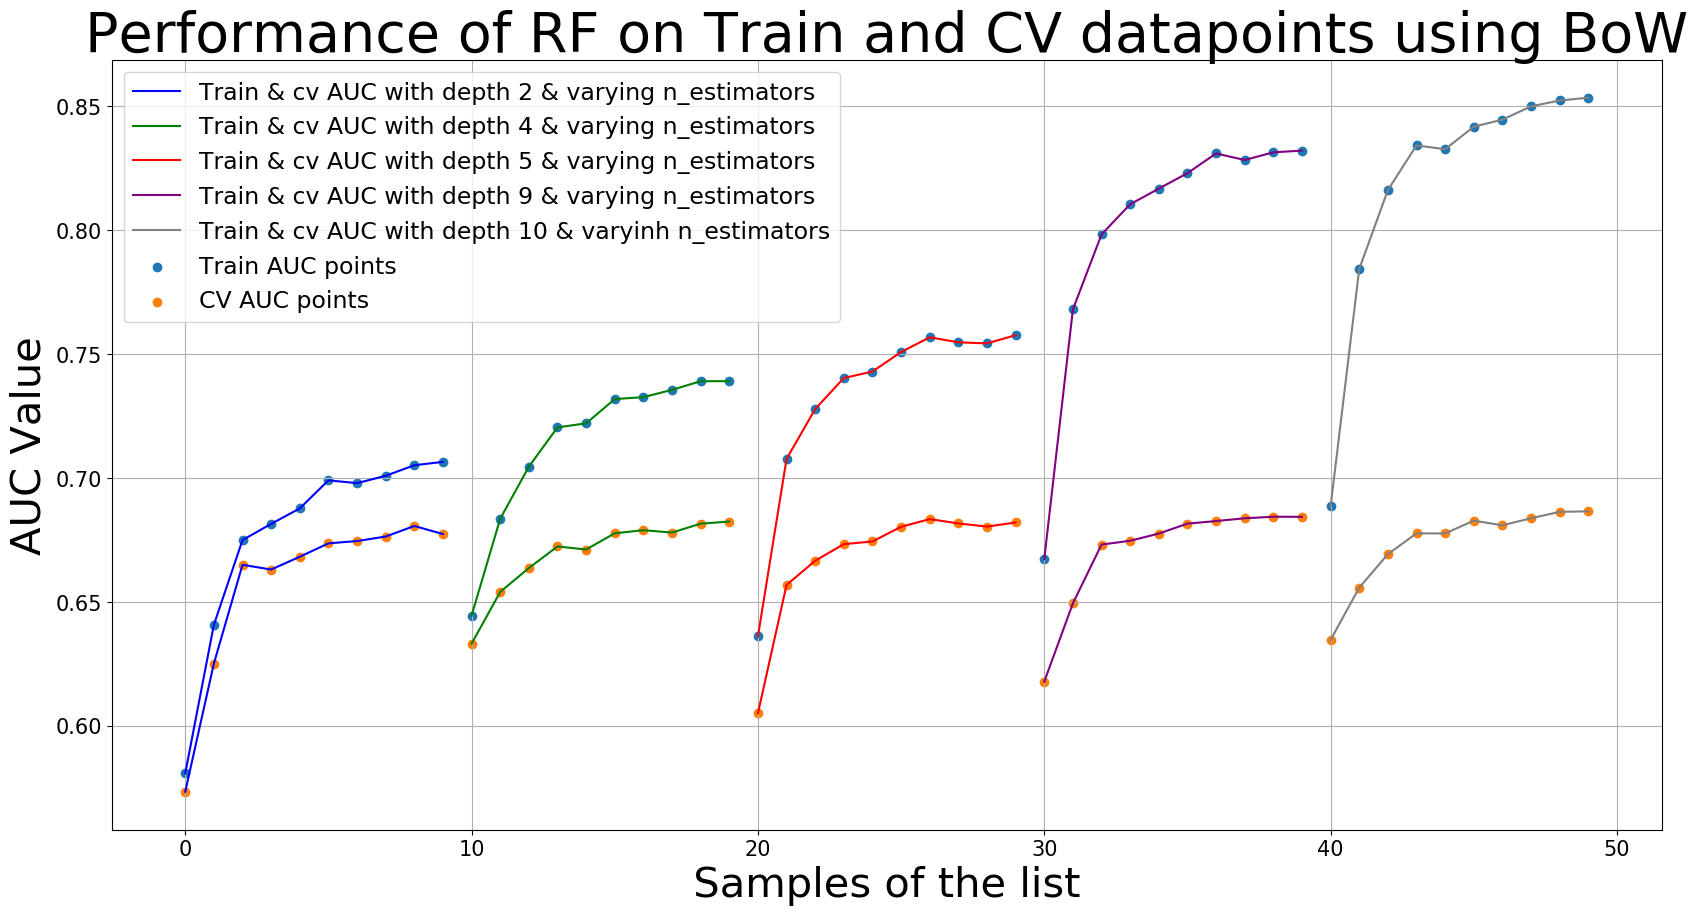

In [271]:
import math
k = [x for x in range(0,50)]
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.plot(k[0:10],train_auc_BoW[0:10], label='Train & cv AUC with depth 2 & varying n_estimators',color = "blue")
plt.plot(k[10:20],train_auc_BoW[10:20], label='Train & cv AUC with depth 4 & varying n_estimators',color = "green")
plt.plot(k[20:30],train_auc_BoW[20:30], label='Train & cv AUC with depth 5 & varying n_estimators',color = "red")
plt.plot(k[30:40],train_auc_BoW[30:40], label='Train & cv AUC with depth 9 & varying n_estimators',color = "purple")
plt.plot(k[40:50],train_auc_BoW[40:50], label='Train & cv AUC with depth 10 & varyinh n_estimators',color = "grey")

plt.plot(k[0:10],cv_auc_BoW[0:10],color = "blue")
plt.plot(k[10:20],cv_auc_BoW[10:20],color = "green")
plt.plot(k[20:30],cv_auc_BoW[20:30],color = "red")
plt.plot(k[30:40],cv_auc_BoW[30:40],color = "purple")
plt.plot(k[40:50],cv_auc_BoW[40:50],color = "grey")

plt.scatter(k,train_auc_BoW, label='Train AUC points')
plt.scatter(k,cv_auc_BoW, label='CV AUC points')
plt.tick_params(labelsize=15)
plt.legend(prop={'size': 17})
plt.xlabel(" Samples of the list ",fontsize = 30)
plt.ylabel("AUC Value",fontsize =30)
plt.title("Performance of RF on Train and CV datapoints using BoW",fontsize=40)
plt.grid()
plt.show()

1) From the Plot obtained above, for each value of depth(2,4,5,9,10) hyperparameter and corresponding variation in number of estimators hyperparameter, the AUC values of Train data keep increasing but AUC values of CV data are stabilized after certain value of n_estimators is attained.

In [357]:
print(cv_auc_BoW[0:10])
print(cv_auc_BoW[10:20])

[0.573, 0.625, 0.665, 0.663, 0.668, 0.674, 0.675, 0.676, 0.681, 0.677]
[0.633, 0.654, 0.664, 0.672, 0.671, 0.678, 0.679, 0.678, 0.682, 0.682]


In [358]:
k = [x for x in range(0,50)]
for i in k:
    cv_auc_BoW[i]= round(cv_auc_BoW[i],3)

In [359]:
import numpy as np

d = [cv_auc_BoW[0:10],cv_auc_BoW[10:20], cv_auc_BoW[20:30],cv_auc_BoW[30:40],cv_auc_BoW[40:50]]


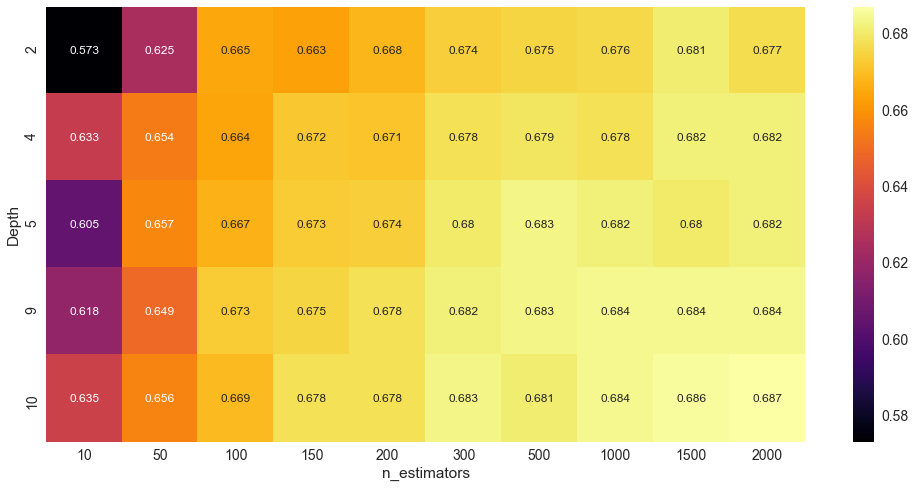

In [393]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
d = pd.DataFrame(d, columns=[10, 50, 100, 150, 200, 300, 500, 1000,1500,2000], index =[2, 4, 5, 9, 10])
d.index.name = 'Depth'
d.columns.name = 'n_estimators'
plt.figure(figsize = (17,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(d, cmap="inferno", annot=True,annot_kws={"size": 12},fmt='g')# font size

1) From the heatmap obtained above,it is compelling to test the data with a depth of 5 and n_estimators to be 500, although there is an increase in the value by 0.04 with increase in both depth(10) and n_estimators(2000) but this increase could lead to overfit on a unseen data.

2) In addition,the values seems to be stabilized in the vicinity of depth = 5 and n_estimator = 500.

3) The Overfit could result as the difference between the AUC scores of Train and CV data points is high. These results could seem interesting but the their performance on unseen or test data could be lower than anticipated.

### Using the Optimal Hyperparameters on Test Data

In [370]:

clf = RandomForestClassifier(n_estimators = 500 , max_depth = 5)
clf.fit(X_train_bow, y_train)
y_train_pred = batch_predict(clf, X_train_bow1)
y_test_pred = batch_predict(clf, X_test_bow1)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

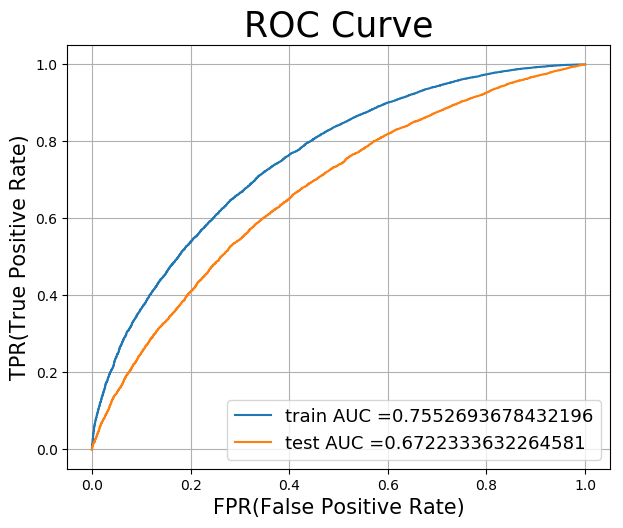

In [371]:
plt.style.use('default')
plt.figure(figsize=(7,5.5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))


plt.legend(prop={'size': 13})
plt.xlabel("FPR(False Positive Rate)",fontsize = 15)
plt.ylabel("TPR(True Positive Rate)",fontsize = 15)
plt.title("ROC Curve",fontsize= 25)
plt.grid()
plt.show()


In [296]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.47019940492437395 for threshold 0.846


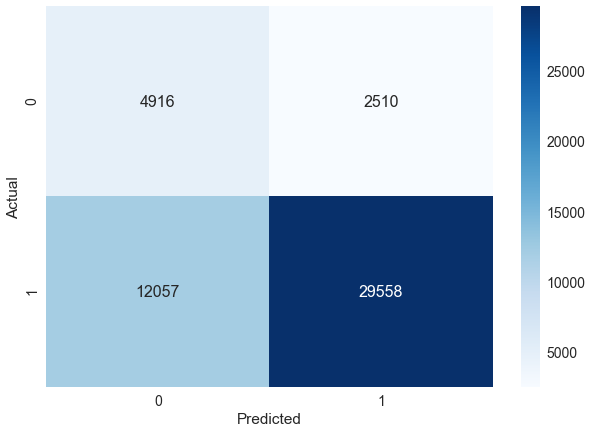

In [373]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
y_train_predicted = predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_train, y_train_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

the maximum value of tpr*(1-fpr) 0.3925637044590182 for threshold 0.847


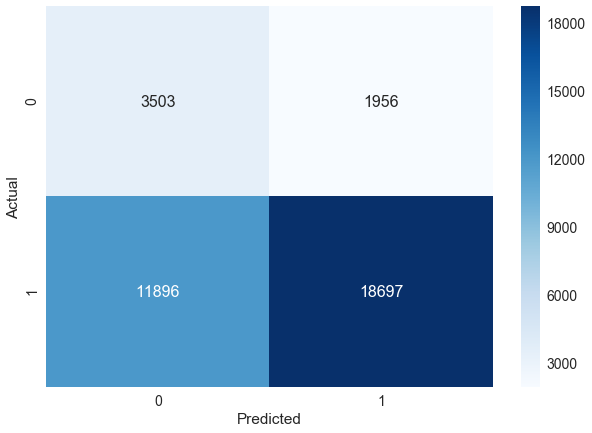

In [374]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
y_test_predicted = predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)
data = confusion_matrix(y_test, y_test_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

In [375]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.47019940492437395 for threshold 0.846
[[ 4916  2510]
 [12057 29558]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3925637044590182 for threshold 0.847
[[ 3503  1956]
 [11896 18697]]


### 8.2 Applying GBDT on BOW,<font color='red'> SET 1</font>

In [244]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

train_auc_BoW_2 = []
cv_auc_BoW_2 = []

K = [10, 50, 100, 150, 200, 300, 500, 1000]
D = [2, 4, 5, 9, 10]
for i in D:
    for j in K:
    
        clf = GradientBoostingClassifier(n_estimators = j,max_depth = i)
        clf.fit(X_train_bow, y_train)
      
        y_train_pred = batch_predict(clf, X_train_bow1)
    
        y_cv_pred = batch_predict(clf, X_cv_bow1)
        # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
        # not the predicted outputs        
        train_auc_BoW_2.append(roc_auc_score(y_train,y_train_pred))
        cv_auc_BoW_2.append(roc_auc_score(y_cv, y_cv_pred))
    print(i)

F:\Newfolder\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



2
4
5
9
10


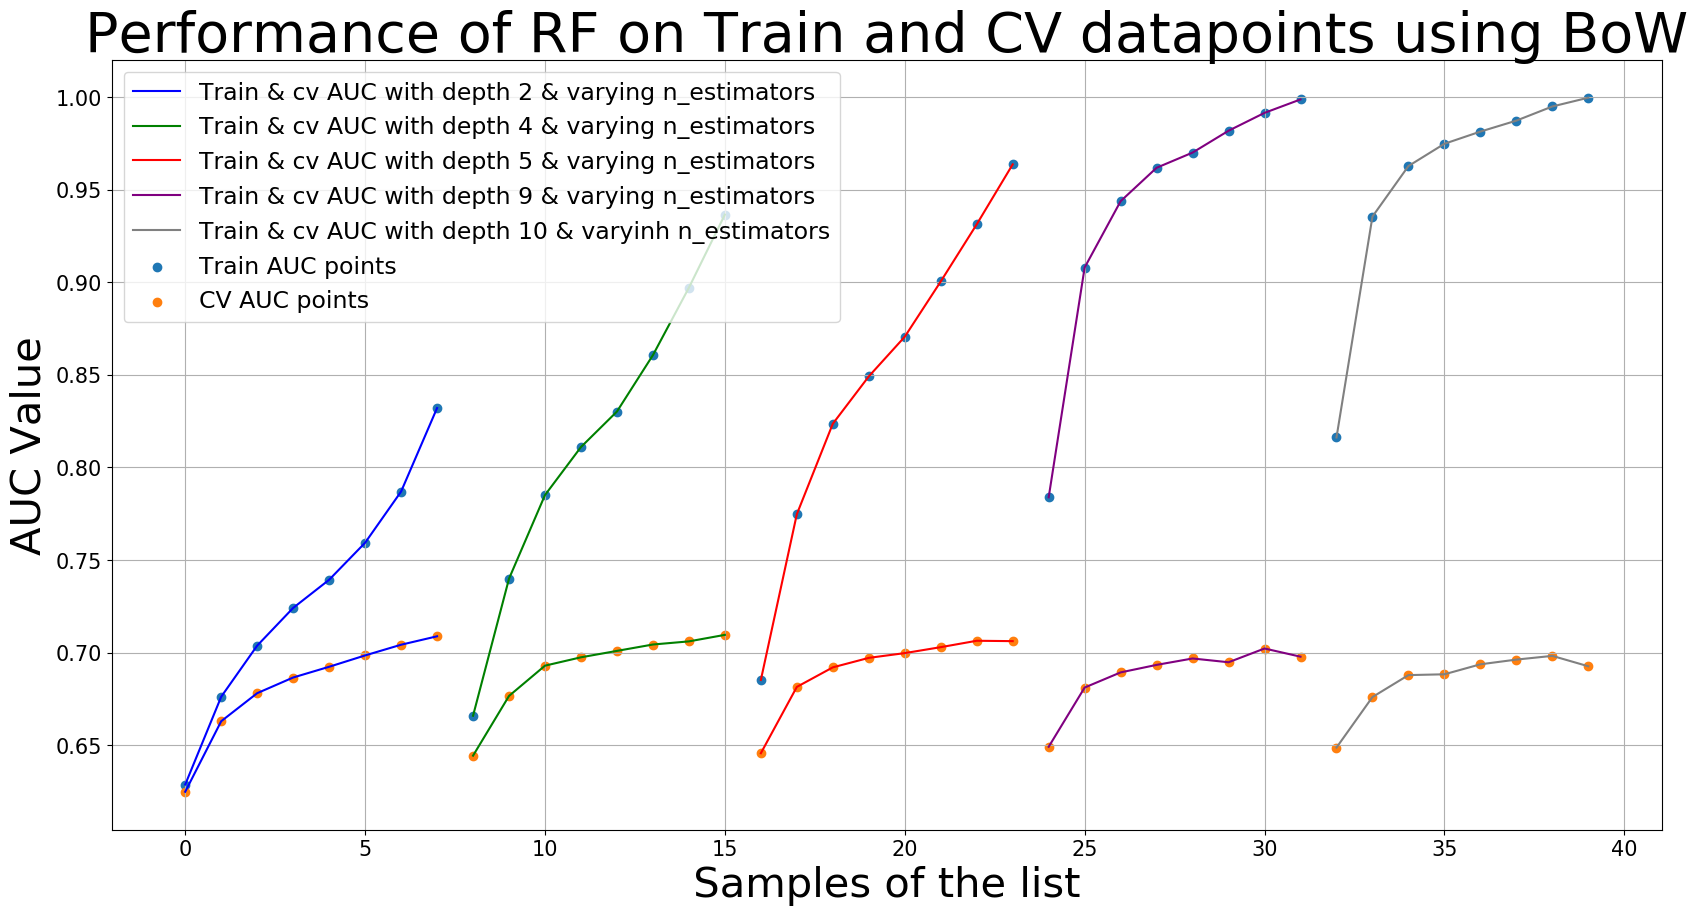

In [246]:
import math
k = [x for x in range(0,40)]
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.plot(k[0:8],train_auc_BoW_2[0:8], label='Train & cv AUC with depth 2 & varying n_estimators',color = "blue")
plt.plot(k[8:16],train_auc_BoW_2[8:16], label='Train & cv AUC with depth 4 & varying n_estimators',color = "green")
plt.plot(k[16:24],train_auc_BoW_2[16:24], label='Train & cv AUC with depth 5 & varying n_estimators',color = "red")
plt.plot(k[24:32],train_auc_BoW_2[24:32], label='Train & cv AUC with depth 9 & varying n_estimators',color = "purple")
plt.plot(k[32:40],train_auc_BoW_2[32:40], label='Train & cv AUC with depth 10 & varyinh n_estimators',color = "grey")

plt.plot(k[0:8],cv_auc_BoW_2[0:8],color = "blue")
plt.plot(k[8:16],cv_auc_BoW_2[8:16],color = "green")
plt.plot(k[16:24],cv_auc_BoW_2[16:24],color = "red")
plt.plot(k[24:32],cv_auc_BoW_2[24:32],color = "purple")
plt.plot(k[32:40],cv_auc_BoW_2[32:40],color = "grey")

plt.scatter(k,train_auc_BoW_2, label='Train AUC points')
plt.scatter(k,cv_auc_BoW_2, label='CV AUC points')
plt.tick_params(labelsize=15)
plt.legend(prop={'size': 17})
plt.xlabel(" Samples of the list ",fontsize = 30)
plt.ylabel("AUC Value",fontsize =30)
plt.title("Performance of RF on Train and CV datapoints using BoW",fontsize=40)
plt.grid()
plt.show()

## <font color='red'>Correction : The Above plot is the Performance of GBDT on Train and CV data Using BoW </font>

1) From the Plot obtained above, for each value of depth(2,4,5,9,10) hyperparameter and corresponding variation in number of estimators hyperparameter, the AUC values of Train data keep increasing but AUC values of CV data are stabilized after certain value for number for n_estimators is attained.

In [248]:
k = [x for x in range(0,40)]
for i in k:
    cv_auc_BoW_2[i]= round(cv_auc_BoW_2[i],3)

In [250]:
d5 = [cv_auc_BoW_2[0:8],cv_auc_BoW_2[8:16], cv_auc_BoW_2[16:24],cv_auc_BoW_2[24:32],cv_auc_BoW_2[32:40]]

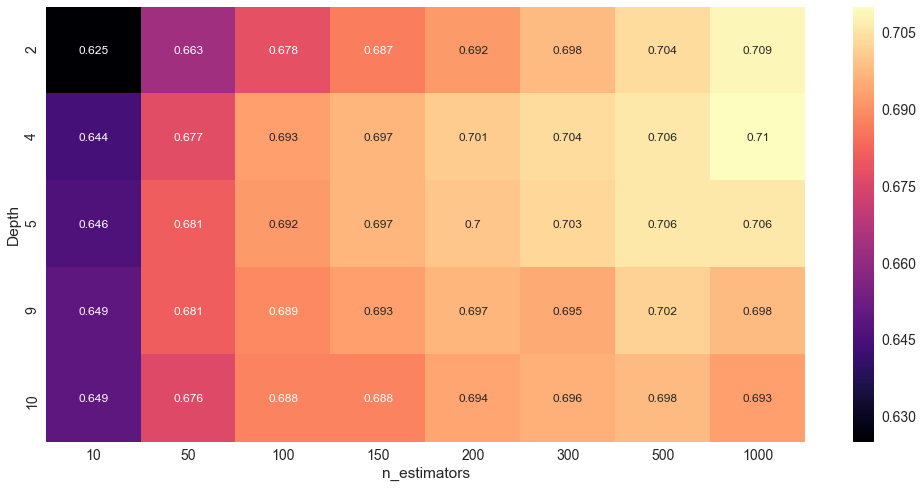

In [259]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
d5 = pd.DataFrame(d5, columns=[10, 50, 100, 150, 200, 300, 500, 1000], index =[2, 4, 5, 9, 10])
d5.index.name = 'Depth'
d5.columns.name = 'n_estimators'
plt.figure(figsize = (17,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(d5, cmap="magma", annot=True,annot_kws={"size": 12},fmt='g')# font size

1) From the heatmap obtained above, it is compelling to test the data with a depth of 4 and n_estimators to be 500, although there is an increase in the value by 0.03 with decrease in  depth(2) and increase in n_estimators(1000) but this increase could lead to overfit on a unseen data.

2) In addition,the values seems to be stabilized in the vicinity of depth = 4 and n_estimator = 500.

3) The Overfit could result as the difference between the AUC scores of Train and CV data points is high. These results could seem interesting but the their performance on unseen or test data could be lower than anticipated.

### Using Opimal Hyperparameters

In [262]:

clf = GradientBoostingClassifier(n_estimators = 500 , max_depth = 4)
clf.fit(X_train_bow, y_train)
y_train_pred = batch_predict(clf, X_train_bow1)
y_test_pred = batch_predict(clf, X_test_bow1)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

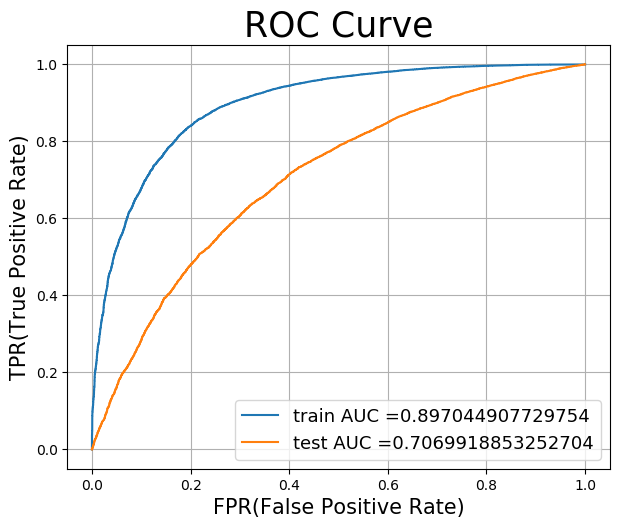

In [263]:
plt.style.use('default')
plt.figure(figsize=(7,5.5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))


plt.legend(prop={'size': 13})
plt.xlabel("FPR(False Positive Rate)",fontsize = 15)
plt.ylabel("TPR(True Positive Rate)",fontsize = 15)
plt.title("ROC Curve",fontsize= 25)
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.6737873972613734 for threshold 0.816


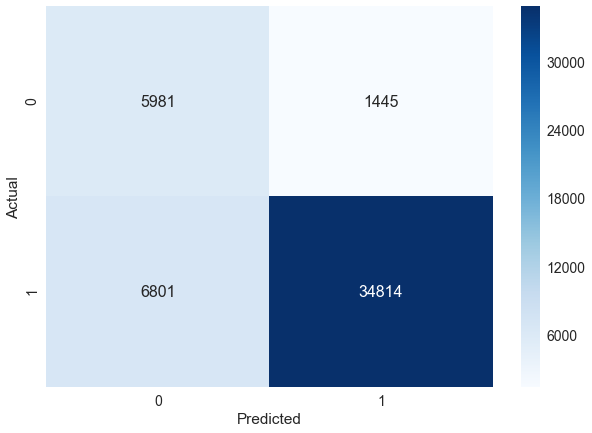

In [266]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
y_train_predicted = predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_train, y_train_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

the maximum value of tpr*(1-fpr) 0.43117914440412675 for threshold 0.804


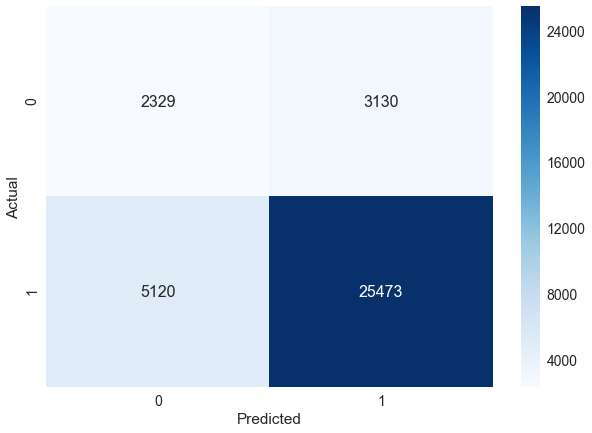

In [267]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
y_test_predicted = predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)
data = confusion_matrix(y_test, y_test_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

### 8.3 Applying Random Forest on TFIDF<font color='red'> SET 2</font>

In [243]:
T_train_tfidf1 = T_train_tfidf.tocsr()
T_cv_tfidf1 = T_cv_tfidf.tocsr()
T_test_tfidf1 = T_test_tfidf.tocsr()

In [287]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

train_auc_TFIDF = []
cv_auc_TFIDF = []
K = [10, 50, 100, 150, 200, 300, 500, 1000,1500,2000]
D = [2, 4, 5, 9, 10]

for i in D:
    for j in K:
        clf = RandomForestClassifier(n_estimators = j,max_depth = i)
        clf.fit(T_train_tfidf, y_train)
      
        y_train_pred = batch_predict(clf, T_train_tfidf1)
        
        y_cv_pred = batch_predict(clf, T_cv_tfidf1)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
        train_auc_TFIDF.append(roc_auc_score(y_train,y_train_pred))
        cv_auc_TFIDF.append(roc_auc_score(y_cv, y_cv_pred))

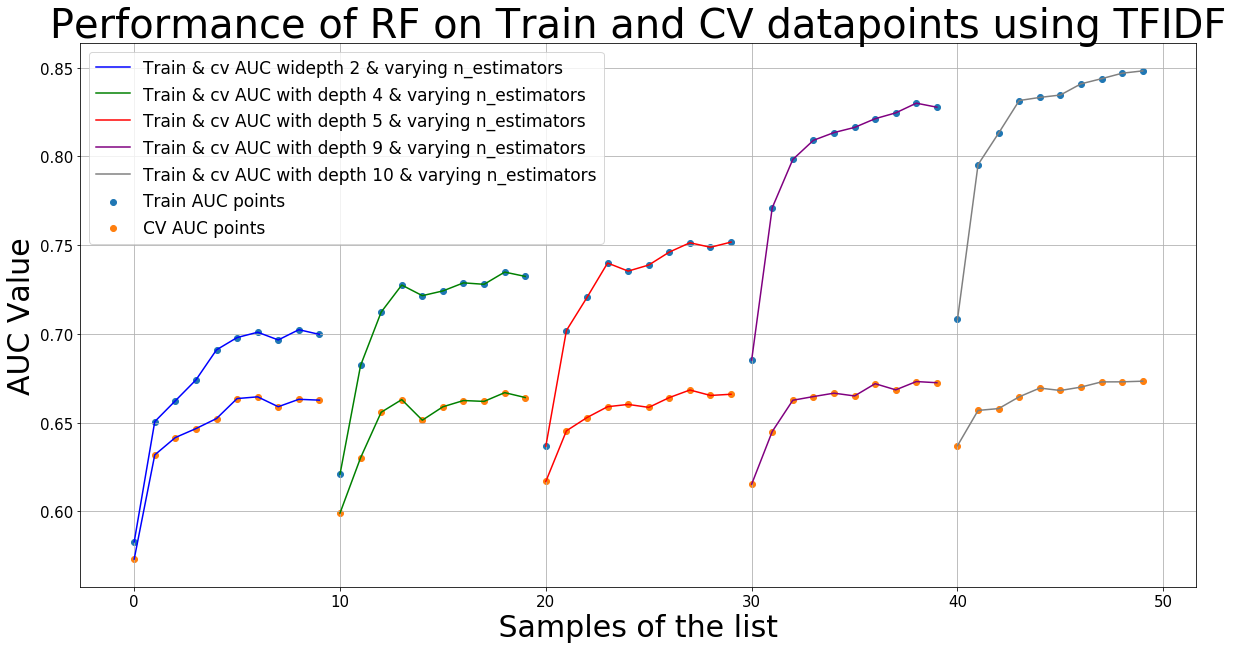

In [288]:
import math
k = [x for x in range(0,50)]
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.plot(k[0:10],train_auc_TFIDF[0:10], label='Train & cv AUC widepth 2 & varying n_estimators',color = "blue")
plt.plot(k[10:20],train_auc_TFIDF[10:20], label='Train & cv AUC with depth 4 & varying n_estimators',color = "green")
plt.plot(k[20:30],train_auc_TFIDF[20:30], label='Train & cv AUC with depth 5 & varying n_estimators',color = "red")
plt.plot(k[30:40],train_auc_TFIDF[30:40], label='Train & cv AUC with depth 9 & varying n_estimators',color = "purple")
plt.plot(k[40:50],train_auc_TFIDF[40:50], label='Train & cv AUC with depth 10 & varying n_estimators',color = "grey")

plt.plot(k[0:10],cv_auc_TFIDF[0:10],color = "blue")
plt.plot(k[10:20],cv_auc_TFIDF[10:20],color = "green")
plt.plot(k[20:30],cv_auc_TFIDF[20:30],color = "red")
plt.plot(k[30:40],cv_auc_TFIDF[30:40],color = "purple")
plt.plot(k[40:50],cv_auc_TFIDF[40:50],color = "grey")

plt.scatter(k,train_auc_TFIDF, label='Train AUC points')
plt.scatter(k,cv_auc_TFIDF, label='CV AUC points')
plt.tick_params(labelsize=15)
plt.legend(prop={'size': 17})
plt.xlabel(" Samples of the list ",fontsize = 30)
plt.ylabel("AUC Value",fontsize =30)
plt.title("Performance of RF on Train and CV datapoints using TFIDF",fontsize=40)
plt.grid()
plt.show()

1) From the Plot obtained above, for each value of depth(2,4,5,9,10) hyperparameter and corresponding variation in number of estimators hyperparameter, the AUC values of Train data keep increasing but AUC values of CV data are stabilized after certain value for number for n_estimators is attained.

In [289]:
k = [x for x in range(0,50)]
for i in k:
    cv_auc_TFIDF[i]= round(cv_auc_TFIDF[i],3)

In [290]:
import numpy as np
d2 = [cv_auc_TFIDF[0:10],cv_auc_TFIDF[10:20], cv_auc_TFIDF[20:30],cv_auc_TFIDF[30:40],cv_auc_TFIDF[40:50]]

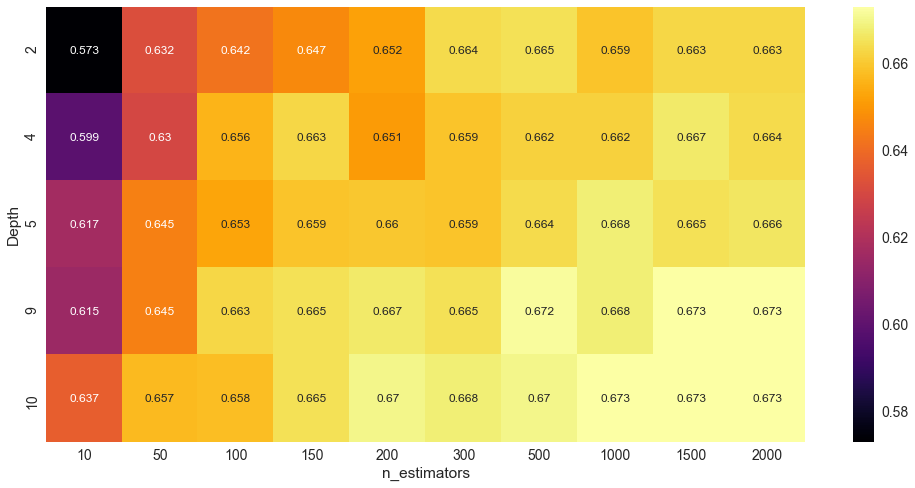

In [292]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
d2 = pd.DataFrame(d2, columns=[10, 50, 100, 150, 200, 300, 500, 1000,1500,2000], index =[2, 4, 5, 9, 10])
d2.index.name = 'Depth'
d2.columns.name = 'n_estimators'
plt.figure(figsize = (17,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(d2, cmap="inferno", annot=True,annot_kws={"size": 12},fmt='g')# font size

1) From the heatmap obtained above, it is compelling to test the data with a depth of 5 and n_estimators to be 500, although there is an increase in the value by 0.03 with increasein  depth(2) and increase in n_estimators(1000) but this increase could lead to overfit on a unseen data.

2) In addition,the values seems to be stabilized in the vicinity of depth = 5 and n_estimator = 500.

3) The Overfit could result as the difference between the AUC scores of Train and CV data points is high. These results could seem interesting but the their performance on unseen or test data could be lower than anticipated.

### Using Optimal Hyperparameters on Test Data

In [293]:

clf = RandomForestClassifier(n_estimators = 500 , max_depth = 5)
clf.fit(T_train_tfidf, y_train)
y_train_pred = batch_predict(clf, T_train_tfidf1)
y_test_pred = batch_predict(clf, T_test_tfidf1)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

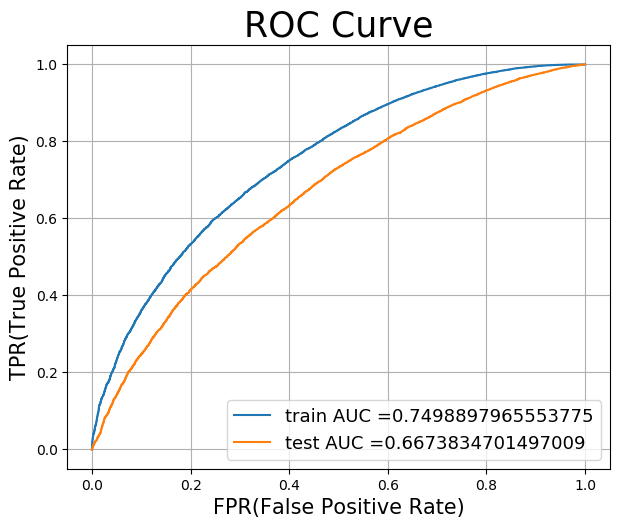

In [297]:
plt.figure(figsize=(7,5.5))
plt.style.use('default')
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))


plt.legend(prop={'size': 13})
plt.xlabel("FPR(False Positive Rate)",fontsize = 15)
plt.ylabel("TPR(True Positive Rate)",fontsize = 15)
plt.title("ROC Curve",fontsize= 25)
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.46046346055157417 for threshold 0.848


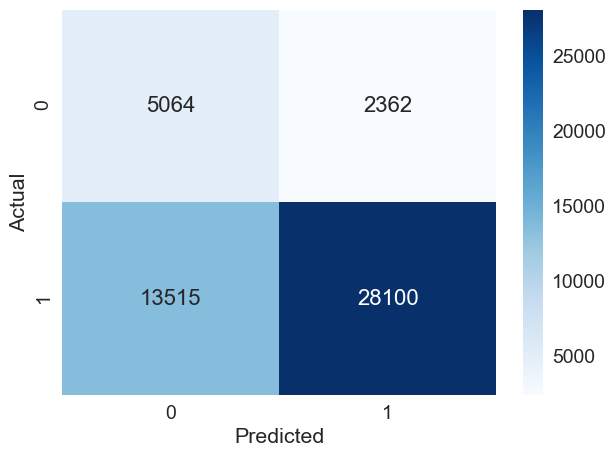

In [301]:

# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
y_train_predicted = predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_train, y_train_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (7,5))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

the maximum value of tpr*(1-fpr) 0.38181069417090424 for threshold 0.849


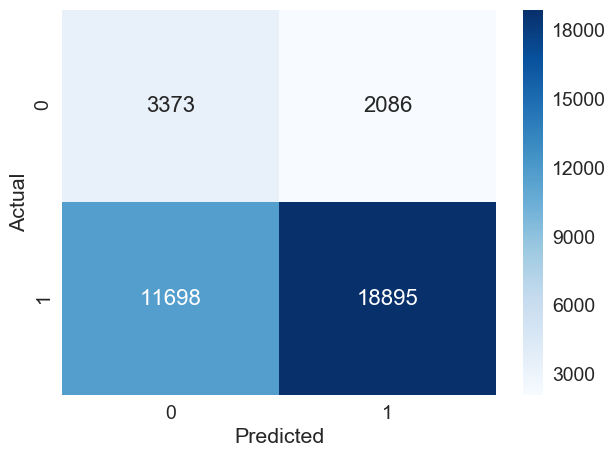

In [302]:
y_test_predicted = predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)
data = confusion_matrix(y_test, y_test_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (7,5))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

In [303]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.46046346055157417 for threshold 0.848
[[ 5064  2362]
 [13515 28100]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.38181069417090424 for threshold 0.849
[[ 3373  2086]
 [11698 18895]]


### 8.4. Applying GBDT on TFIDF<font color='red'> SET 2</font>

In [244]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

train_auc_TFIDF_2 = []
cv_auc_TFIDF_2 = []

K = [10, 50, 100, 150, 200, 300, 500, 1000]
D = [2, 4, 5, 9, 10]
for i in D:
    for j in K:
    
        clf = GradientBoostingClassifier(n_estimators = j,max_depth = i)
        clf.fit(T_train_tfidf, y_train)
      
        y_train_pred = batch_predict(clf, T_train_tfidf1)
    
        y_cv_pred = batch_predict(clf, T_cv_tfidf1)
        # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
        # not the predicted outputs        
        train_auc_TFIDF_2.append(roc_auc_score(y_train,y_train_pred))
        cv_auc_TFIDF_2.append(roc_auc_score(y_cv, y_cv_pred))

        print(i)

F:\Newfolder\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



2
4
5
9
10


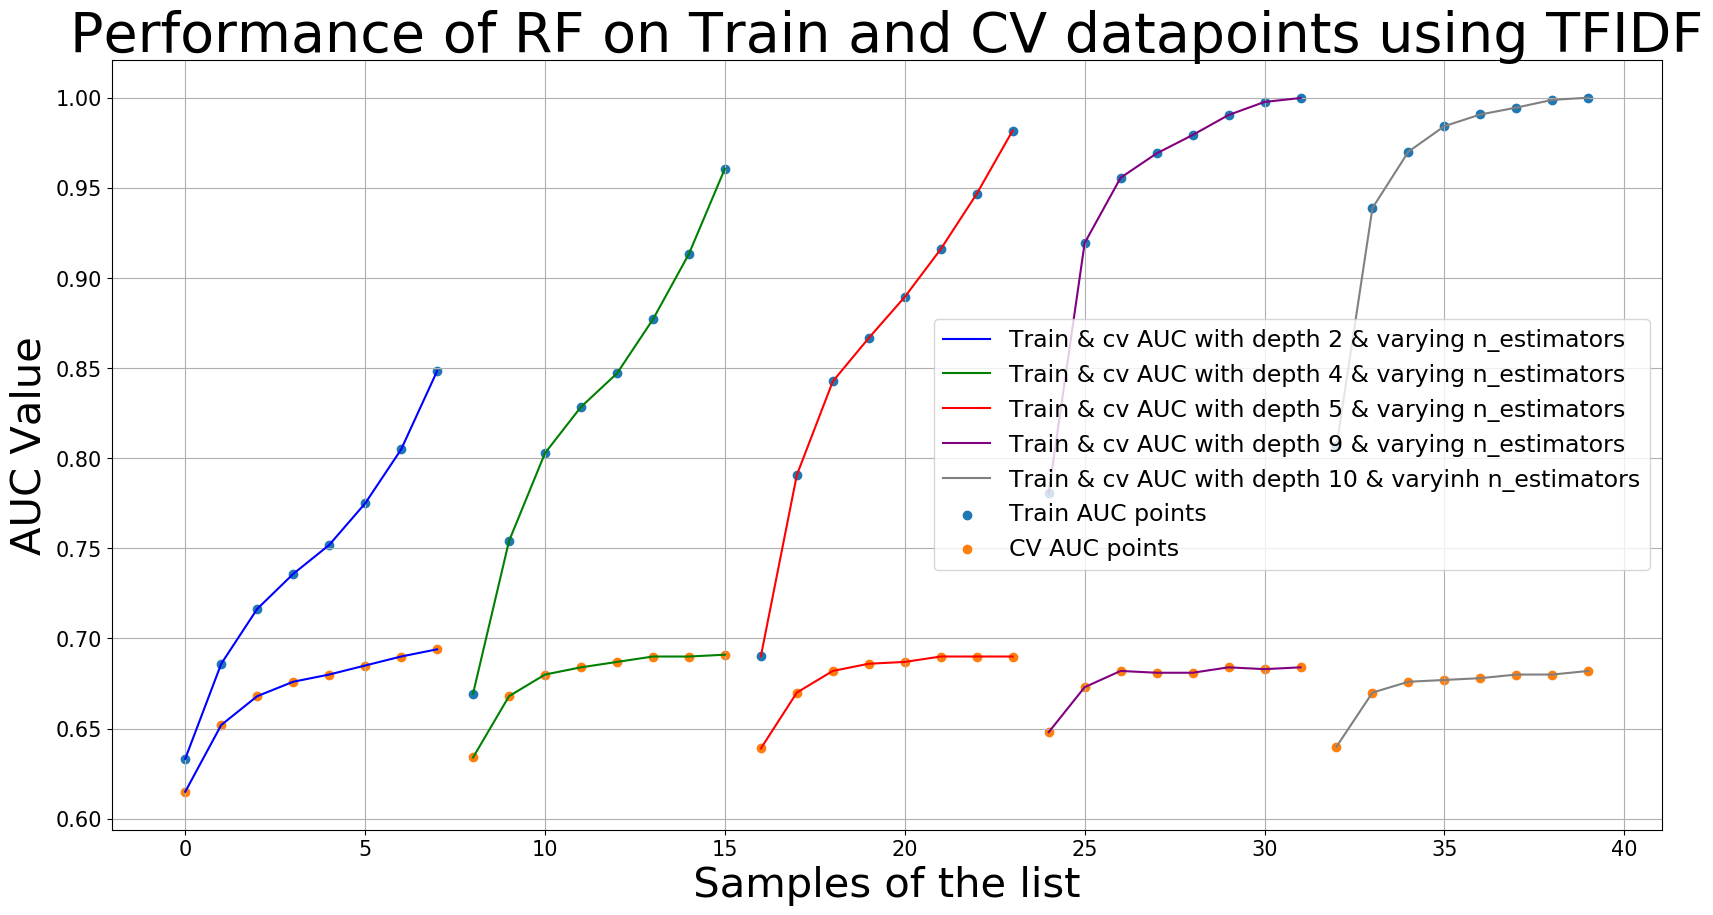

In [253]:
import math
k = [x for x in range(0,40)]
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.plot(k[0:8],train_auc_TFIDF_2[0:8], label='Train & cv AUC with depth 2 & varying n_estimators',color = "blue")
plt.plot(k[8:16],train_auc_TFIDF_2[8:16], label='Train & cv AUC with depth 4 & varying n_estimators',color = "green")
plt.plot(k[16:24],train_auc_TFIDF_2[16:24], label='Train & cv AUC with depth 5 & varying n_estimators',color = "red")
plt.plot(k[24:32],train_auc_TFIDF_2[24:32], label='Train & cv AUC with depth 9 & varying n_estimators',color = "purple")
plt.plot(k[32:40],train_auc_TFIDF_2[32:40], label='Train & cv AUC with depth 10 & varyinh n_estimators',color = "grey")

plt.plot(k[0:8],cv_auc_TFIDF_2[0:8],color = "blue")
plt.plot(k[8:16],cv_auc_TFIDF_2[8:16],color = "green")
plt.plot(k[16:24],cv_auc_TFIDF_2[16:24],color = "red")
plt.plot(k[24:32],cv_auc_TFIDF_2[24:32],color = "purple")
plt.plot(k[32:40],cv_auc_TFIDF_2[32:40],color = "grey")

plt.scatter(k,train_auc_TFIDF_2, label='Train AUC points')
plt.scatter(k,cv_auc_TFIDF_2, label='CV AUC points')
plt.tick_params(labelsize=15)
plt.legend(prop={'size': 17})
plt.xlabel(" Samples of the list ",fontsize = 30)
plt.ylabel("AUC Value",fontsize =30)
plt.title("Performance of RF on Train and CV datapoints using TFIDF",fontsize=40)
plt.grid()
plt.show()

## <font color='red'>Correction : The Above plot is the Performance of GBDT on Train and CV data Using TFIDF </font>

1) From the Plot obtained above, for each value of depth(2,4,5,9,10) hyperparameter and corresponding variation in number of estimators hyperparameter, the AUC values of Train data keep increasing but AUC values of CV data are stabilized after certain value of n_estimators is attained.

In [247]:
k = [x for x in range(0,40)]
for i in k:
    cv_auc_TFIDF_2[i]= round(cv_auc_TFIDF_2[i],3)

In [248]:
d6 = [cv_auc_TFIDF_2[0:8],cv_auc_TFIDF_2[8:16], cv_auc_TFIDF_2[16:24],cv_auc_TFIDF_2[24:32],cv_auc_TFIDF_2[32:40]]

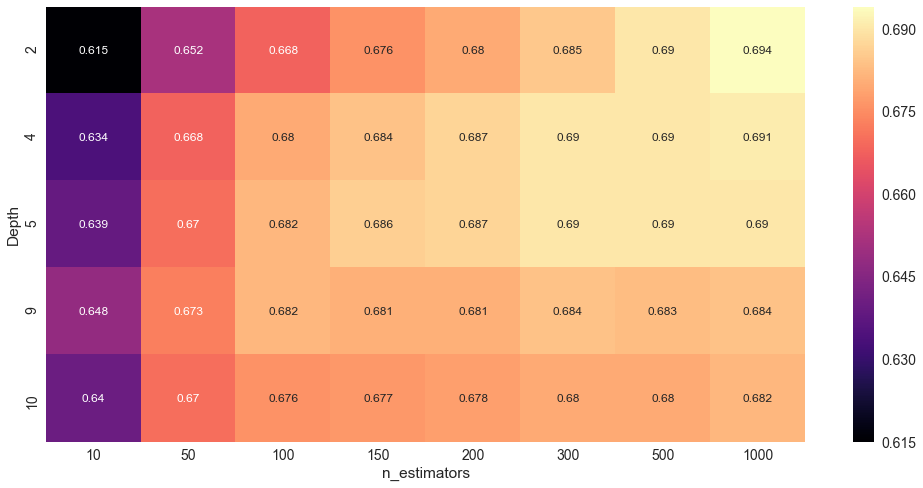

In [249]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
d6 = pd.DataFrame(d6, columns=[10, 50, 100, 150, 200, 300, 500, 1000], index =[2, 4, 5, 9, 10])
d6.index.name = 'Depth'
d6.columns.name = 'n_estimators'
plt.figure(figsize = (17,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(d6, cmap="magma", annot=True,annot_kws={"size": 12},fmt='g')# font size

1) From the heatmap obtained above, it is compelling to test the data with a depth of 4 and n_estimators to be 300, although there is an increase in the value by 0.04 with decrease in  depth(2) and increase in n_estimators(1000) but this increase could lead to overfit on a unseen data.

2) In addition,the values seems to be stabilized in the vicinity of depth = 4 and n_estimator = 300.

3) The Overfit could result as the difference between the AUC scores of Train and CV data points is high. These results could seem interesting but the their performance on unseen or test data could be lower than anticipated.

### Using Optimal Hyperparameters on Test Data

In [254]:

clf = GradientBoostingClassifier(n_estimators = 300 , max_depth = 4)
clf.fit(T_train_tfidf, y_train)
y_train_pred = batch_predict(clf, T_train_tfidf1)
y_test_pred = batch_predict(clf, T_test_tfidf1)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

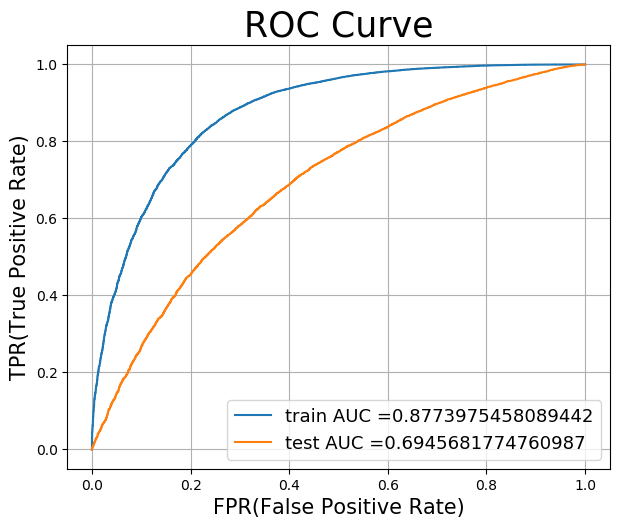

In [255]:
plt.figure(figsize=(7,5.5))
plt.style.use('default')
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))


plt.legend(prop={'size': 13})
plt.xlabel("FPR(False Positive Rate)",fontsize = 15)
plt.ylabel("TPR(True Positive Rate)",fontsize = 15)
plt.title("ROC Curve",fontsize= 25)
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.6383950076009685 for threshold 0.827


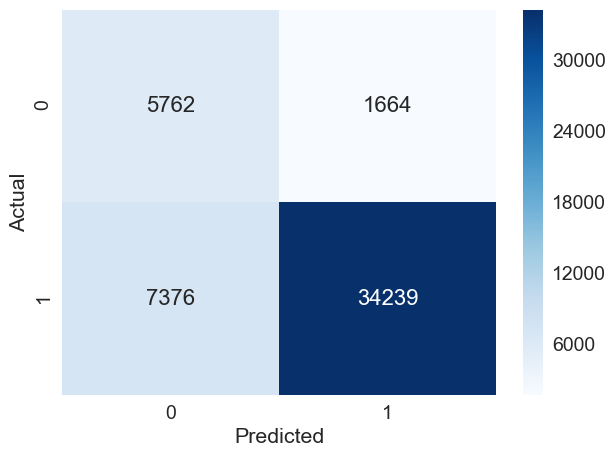

In [256]:
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
y_train_predicted = predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_train, y_train_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (7,5))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

the maximum value of tpr*(1-fpr) 0.4159927680238096 for threshold 0.825


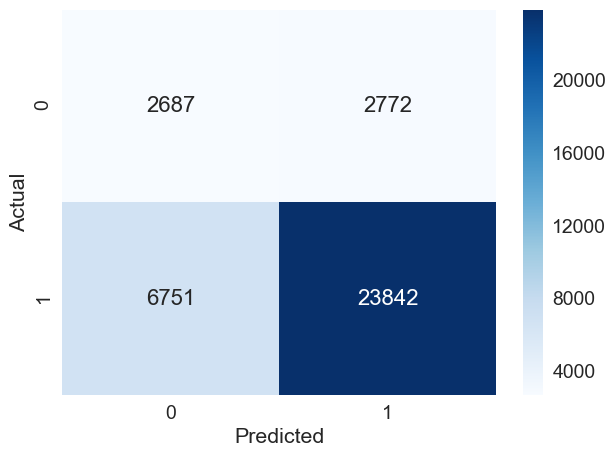

In [257]:
y_test_predicted = predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)
data = confusion_matrix(y_test, y_test_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (7,5))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

### 8.5. Applying Random Forest on AVG_W2V<font color='red'> SET 3</font>

In [300]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


train_auc_avg_w2v = []
cv_auc_avg_w2v = []
K = [10, 50, 100, 150, 200, 300, 500, 1000,1500,2000]
D = [2, 4, 5, 9, 10]

for i in D:
    for j in K:
        clf = RandomForestClassifier(n_estimators = j,max_depth = i)
        clf.fit(A_train_avg_w2v, y_train)
      
        y_train_pred = batch_predict(clf, A_train_avg_w2v)
        
        y_cv_pred = batch_predict(clf, A_cv_avg_w2v)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
        train_auc_avg_w2v.append(roc_auc_score(y_train,y_train_pred))
        cv_auc_avg_w2v.append(roc_auc_score(y_cv, y_cv_pred))

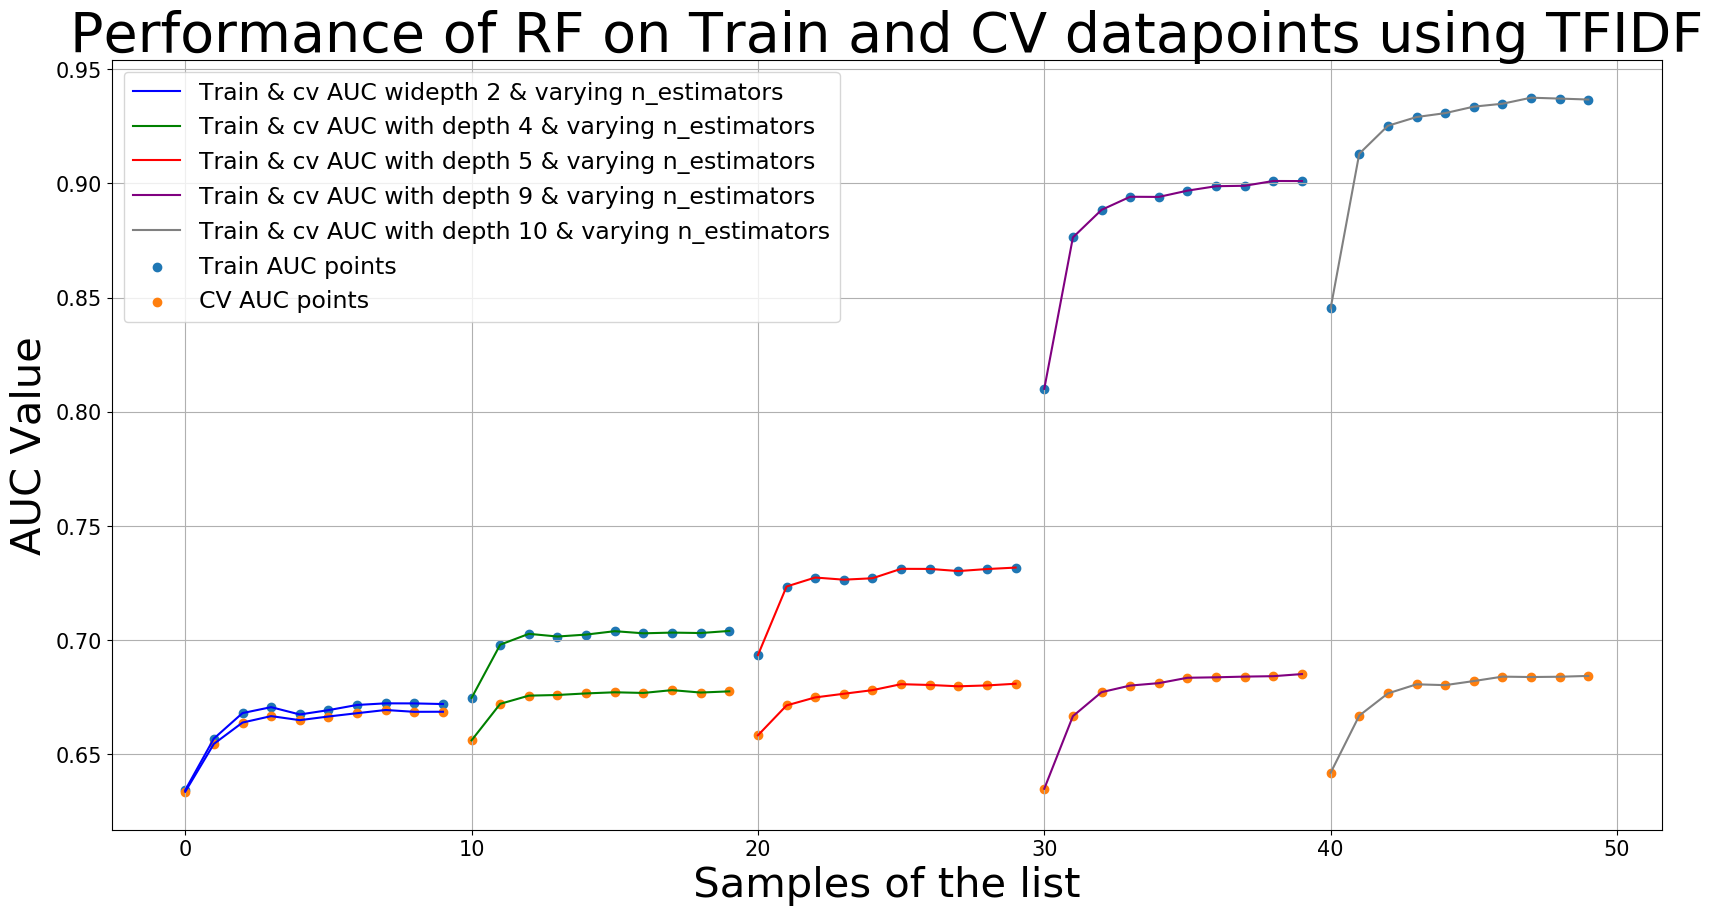

In [302]:
import math
k = [x for x in range(0,50)]
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.plot(k[0:10],train_auc_avg_w2v[0:10], label='Train & cv AUC widepth 2 & varying n_estimators',color = "blue")
plt.plot(k[10:20],train_auc_avg_w2v[10:20], label='Train & cv AUC with depth 4 & varying n_estimators',color = "green")
plt.plot(k[20:30],train_auc_avg_w2v[20:30], label='Train & cv AUC with depth 5 & varying n_estimators',color = "red")
plt.plot(k[30:40],train_auc_avg_w2v[30:40], label='Train & cv AUC with depth 9 & varying n_estimators',color = "purple")
plt.plot(k[40:50],train_auc_avg_w2v[40:50], label='Train & cv AUC with depth 10 & varying n_estimators',color = "grey")

plt.plot(k[0:10],cv_auc_avg_w2v[0:10],color = "blue")
plt.plot(k[10:20],cv_auc_avg_w2v[10:20],color = "green")
plt.plot(k[20:30],cv_auc_avg_w2v[20:30],color = "red")
plt.plot(k[30:40],cv_auc_avg_w2v[30:40],color = "purple")
plt.plot(k[40:50],cv_auc_avg_w2v[40:50],color = "grey")

plt.scatter(k,train_auc_avg_w2v, label='Train AUC points')
plt.scatter(k,cv_auc_avg_w2v, label='CV AUC points')
plt.tick_params(labelsize=15)
plt.legend(prop={'size': 17})
plt.xlabel(" Samples of the list ",fontsize = 30)
plt.ylabel("AUC Value",fontsize =30)
plt.title("Performance of RF on Train and CV datapoints using TFIDF",fontsize=40)
plt.grid()
plt.show()

## <font color='red'>Correction : The Above plot is the Performance of RF on Train and CV data Using Avg_W2V </font>

1) From the Plot obtained above, for each value of depth(2,4,5,9,10) hyperparameter and corresponding variation in number of estimators hyperparameter, the AUC values of Train data keep increasing but AUC values of CV data are stabilized after certain value of n_estimators is attained.

In [304]:
k = [x for x in range(0,50)]
for i in k:
    cv_auc_avg_w2v[i]= round(cv_auc_avg_w2v[i],3)

In [305]:
import numpy as np
d3 = [cv_auc_avg_w2v[0:10],cv_auc_avg_w2v[10:20], cv_auc_avg_w2v[20:30],cv_auc_avg_w2v[30:40],cv_auc_avg_w2v[40:50]]

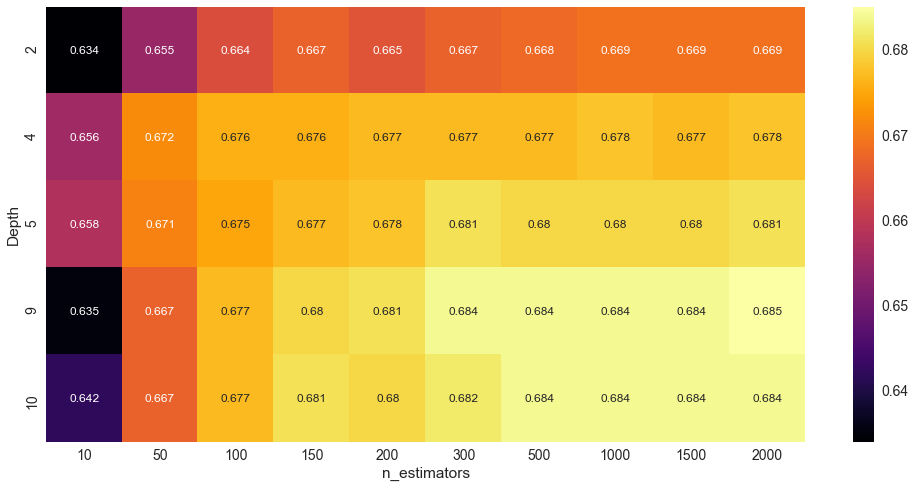

In [307]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
d3 = pd.DataFrame(d3, columns=[10, 50, 100, 150, 200, 300, 500, 1000,1500,2000], index =[2, 4, 5, 9, 10])
d3.index.name = 'Depth'
d3.columns.name = 'n_estimators'
plt.figure(figsize = (17,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(d3, cmap="inferno", annot=True,annot_kws={"size": 12},fmt='g')# font size

1) From the heatmap obtained above, it is compelling to test the data with a depth of 9 and n_estimators to be 500, although there is an increase in the value by 0.01 with same depth(9) and increase in n_estimators(2000) but this increase could lead to overfit on a unseen data.

2) In addition,the values seems to be stabilized in the vicinity of depth = 9 and n_estimator = 500.

3) The Overfit could result as the difference between the AUC scores of Train and CV data points is high. These results could seem interesting but the their performance on unseen or test data could be lower than anticipated.

### Using Optimal Hyperparamters on Test Data

In [314]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

clf = RandomForestClassifier(n_estimators = 500 , max_depth = 9)
clf.fit(A_train_avg_w2v, y_train)
y_train_pred = batch_predict(clf, A_train_avg_w2v)
y_test_pred = batch_predict(clf, A_test_avg_w2v)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

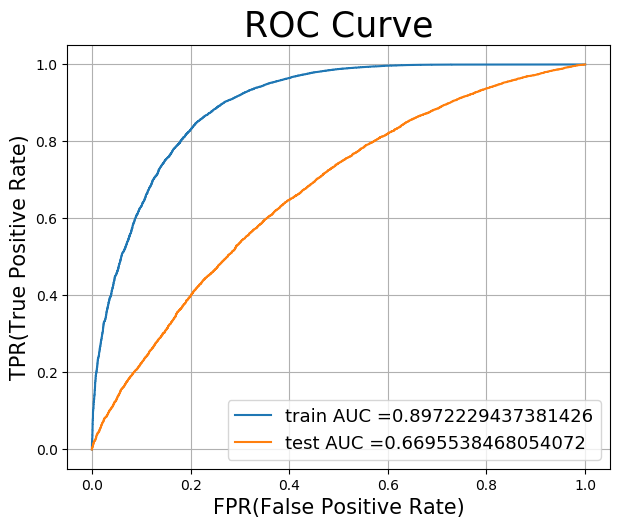

In [318]:
plt.figure(figsize=(7,5.5))
plt.style.use('default')
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))


plt.legend(prop={'size': 13})
plt.xlabel("FPR(False Positive Rate)",fontsize = 15)
plt.ylabel("TPR(True Positive Rate)",fontsize = 15)
plt.title("ROC Curve",fontsize= 25)
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.6692362003163481 for threshold 0.834


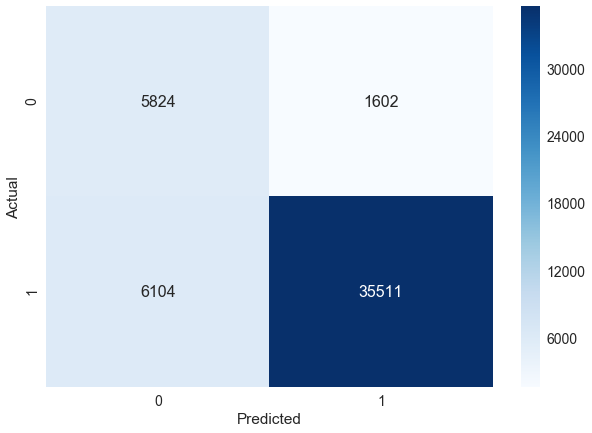

In [321]:
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
y_train_predicted = predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_train, y_train_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

the maximum value of tpr*(1-fpr) 0.39045098101077536 for threshold 0.822


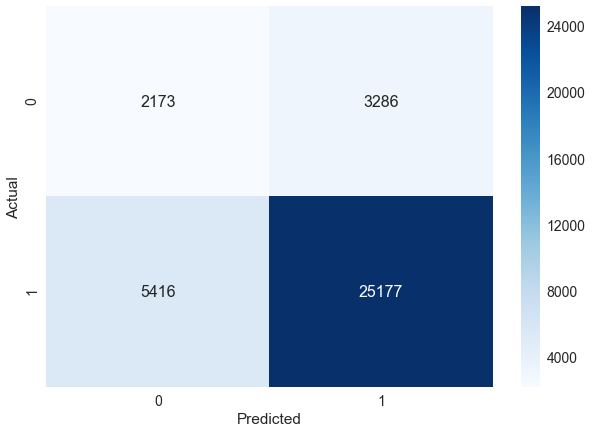

In [322]:
y_test_predicted = predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)
data = confusion_matrix(y_test, y_test_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

In [165]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.413328046303406 for threshold 0.86
[[ 4782  2644]
 [14904 26711]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.39642225097773787 for threshold 0.877
[[ 3872  1587]
 [14307 16286]]


### 8.6. Applying GBDT on AVG_W2V<font color='red'> SET 3</font>

In [260]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

train_auc_avg_w2v_2 = []
cv_auc_avg_w2v_2 = []

K = [10, 50, 100, 150, 200, 300, 500, 1000]
D = [2, 4, 5, 9, 10]
for i in D:
    for j in K:
        
    
        clf = GradientBoostingClassifier(n_estimators = j,max_depth = i)
        clf.fit(A_train_avg_w2v, y_train)
      
        y_train_pred = batch_predict(clf, A_train_avg_w2v)
    
        y_cv_
        pred = batch_predict(clf, A_cv_avg_w2v)
        # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
        # not the predicted outputs        
        train_auc_avg_w2v_2.append(roc_auc_score(y_train,y_train_pred))
        cv_auc_avg_w2v_2.append(roc_auc_score(y_cv, y_cv_pred))
    print(i)

F:\Newfolder\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



2
4
5
9
10


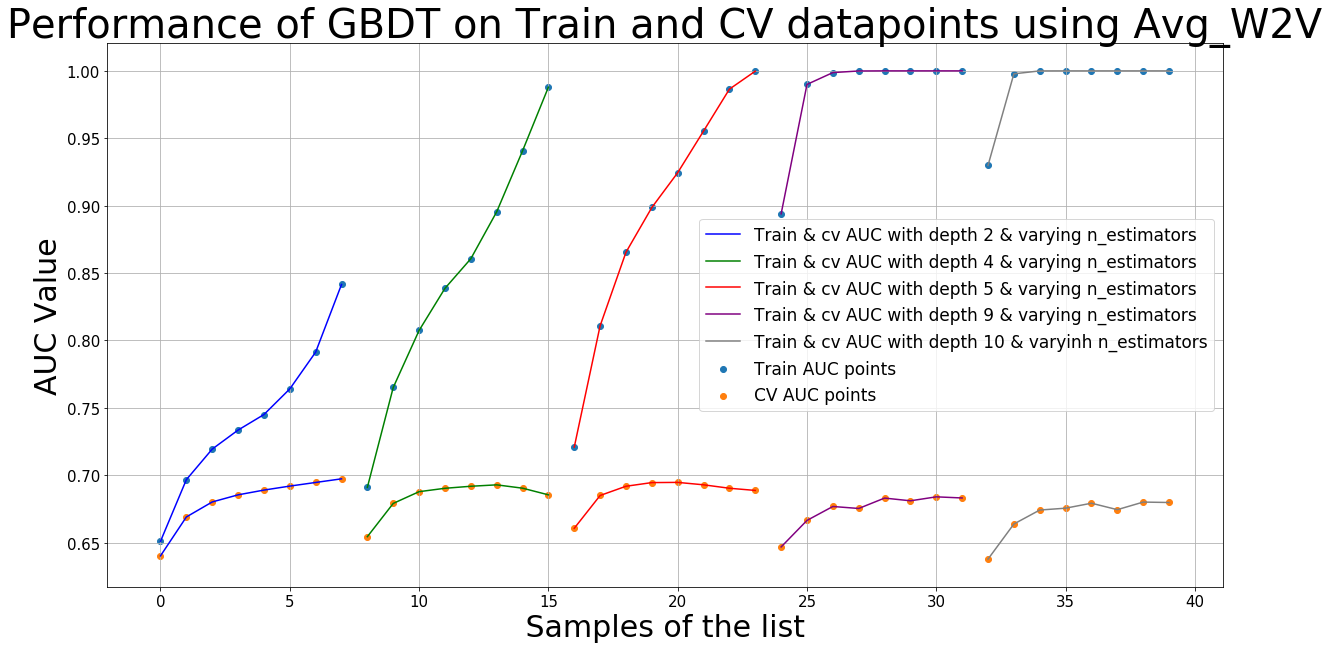

In [261]:
import math
k = [x for x in range(0,40)]
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.plot(k[0:8],train_auc_avg_w2v_2[0:8], label='Train & cv AUC with depth 2 & varying n_estimators',color = "blue")
plt.plot(k[8:16],train_auc_avg_w2v_2[8:16], label='Train & cv AUC with depth 4 & varying n_estimators',color = "green")
plt.plot(k[16:24],train_auc_avg_w2v_2[16:24], label='Train & cv AUC with depth 5 & varying n_estimators',color = "red")
plt.plot(k[24:32],train_auc_avg_w2v_2[24:32], label='Train & cv AUC with depth 9 & varying n_estimators',color = "purple")
plt.plot(k[32:40],train_auc_avg_w2v_2[32:40], label='Train & cv AUC with depth 10 & varyinh n_estimators',color = "grey")

plt.plot(k[0:8],cv_auc_avg_w2v_2[0:8],color = "blue")
plt.plot(k[8:16],cv_auc_avg_w2v_2[8:16],color = "green")
plt.plot(k[16:24],cv_auc_avg_w2v_2[16:24],color = "red")
plt.plot(k[24:32],cv_auc_avg_w2v_2[24:32],color = "purple")
plt.plot(k[32:40],cv_auc_avg_w2v_2[32:40],color = "grey")

plt.scatter(k,train_auc_avg_w2v_2, label='Train AUC points')
plt.scatter(k,cv_auc_avg_w2v_2, label='CV AUC points')
plt.tick_params(labelsize=15)
plt.legend(prop={'size': 17})
plt.xlabel(" Samples of the list ",fontsize = 30)
plt.ylabel("AUC Value",fontsize =30)
plt.title("Performance of GBDT on Train and CV datapoints using Avg_W2V",fontsize=40)
plt.grid()
plt.show()

1) From the Plot obtained above, for each value of depth(2,4,5,9,10) hyperparameter and corresponding variation in number of estimators hyperparameter, the AUC values of Train data keep increasing but AUC values of CV data are stabilized after certain value of n_estimators is attained.

In [262]:
k = [x for x in range(0,40)]
for i in k:
    cv_auc_avg_w2v_2[i]= round(cv_auc_avg_w2v_2[i],3)

In [263]:
d7 = [cv_auc_avg_w2v_2[0:8],cv_auc_avg_w2v_2[8:16], cv_auc_avg_w2v_2[16:24],cv_auc_avg_w2v_2[24:32],cv_auc_avg_w2v_2[32:40]]

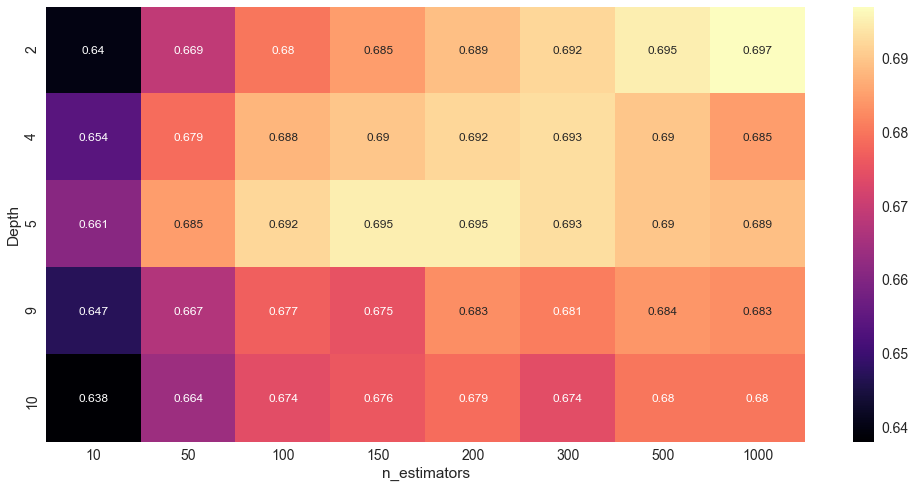

In [265]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
d7 = pd.DataFrame(d7, columns=[10, 50, 100, 150, 200, 300, 500, 1000], index =[2, 4, 5, 9, 10])
d7.index.name = 'Depth'
d7.columns.name = 'n_estimators'
plt.figure(figsize = (17,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(d7, cmap="magma", annot=True,annot_kws={"size": 12},fmt='g')# font size

1) From the heatmap obtained above, it is compelling to test the data with a depth of 5 and n_estimators to be 150, although there is an increase in the value by 0.02 with decrease in  depth(2) and increase in n_estimators(1000) but this increase could lead to overfit on a unseen data.

2) In addition,the values seems to be stabilized in the vicinity of depth = 5 and n_estimator = 150.

3) The Overfit could result as the difference between the AUC scores of Train and CV data points is high. These results could seem interesting but the their performance on unseen or test data could be lower than anticipated.

###  Using Optimal Hyperparamters on Test Data

In [300]:

clf = GradientBoostingClassifier(n_estimators = 150 , max_depth = 5)
clf.fit(A_train_avg_w2v, y_train)
y_train_pred = batch_predict(clf, A_train_avg_w2v)
y_test_pred = batch_predict(clf, A_test_avg_w2v)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

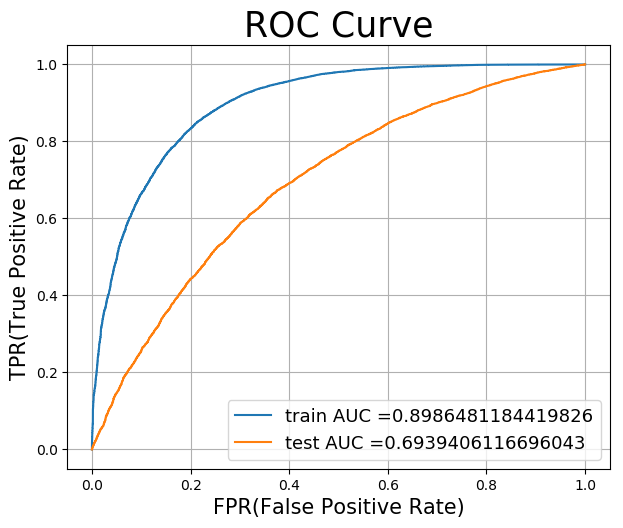

In [302]:
plt.figure(figsize=(7,5.5))
plt.style.use('default')
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))


plt.legend(prop={'size': 13})
plt.xlabel("FPR(False Positive Rate)",fontsize = 15)
plt.ylabel("TPR(True Positive Rate)",fontsize = 15)
plt.title("ROC Curve",fontsize= 25)
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.6691459866469273 for threshold 0.82


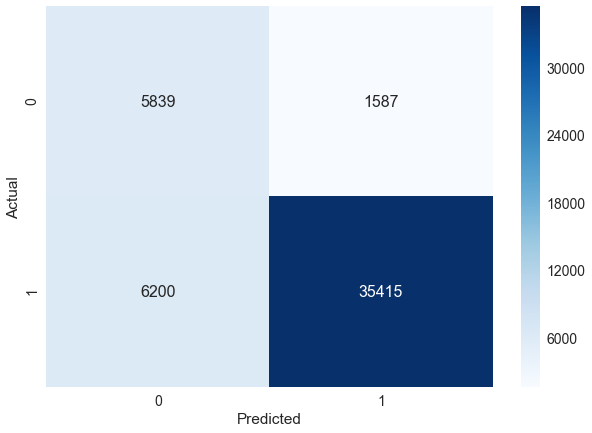

In [303]:
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
y_train_predicted = predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_train, y_train_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

the maximum value of tpr*(1-fpr) 0.4204854070142503 for threshold 0.795


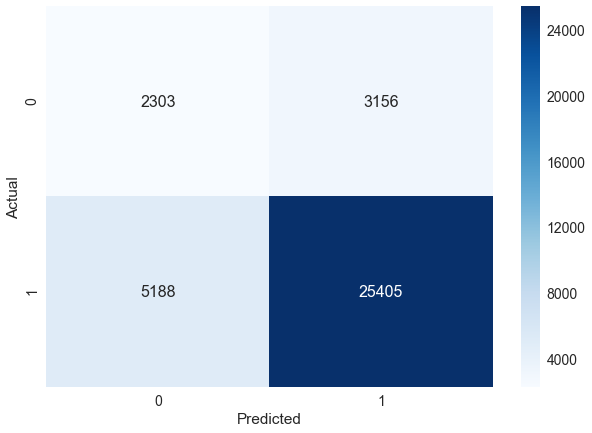

In [305]:
y_test_predicted = predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)
data = confusion_matrix(y_test, y_test_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

In [306]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.6691459866469273 for threshold 0.82
[[ 5839  1587]
 [ 6200 35415]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4204854070142503 for threshold 0.795
[[ 2303  3156]
 [ 5188 25405]]


### 8.6 Applying Random Forest on TFIDF_W2V<font color='red'> SET 4</font>

In [166]:
L_train_Tfidf_avg_w2v1 = L_train_Tfidf_avg_w2v.tocsr()
L_cv_Tfidf_avg_w2v1 = L_cv_Tfidf_avg_w2v.tocsr()
L_test_Tfidf_avg_w2v1 = L_test_Tfidf_avg_w2v.tocsr()

In [308]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


train_auc_TFIDF_w2v = []
cv_auc_TFIDF_w2v = []
K = [10, 50, 100, 150, 200, 300, 500, 1000,1500,2000]
D = [2, 4, 5, 9, 10]

for i in D:
    
    
    for j in K:
        clf = RandomForestClassifier(n_estimators = j,max_depth = i)
        clf.fit(L_train_Tfidf_avg_w2v, y_train)
      
        y_train_pred = batch_predict(clf, L_train_Tfidf_avg_w2v)
        
        y_cv_pred = batch_predict(clf, L_cv_Tfidf_avg_w2v)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
        train_auc_TFIDF_w2v.append(roc_auc_score(y_train,y_train_pred))
        cv_auc_TFIDF_w2v.append(roc_auc_score(y_cv, y_cv_pred))

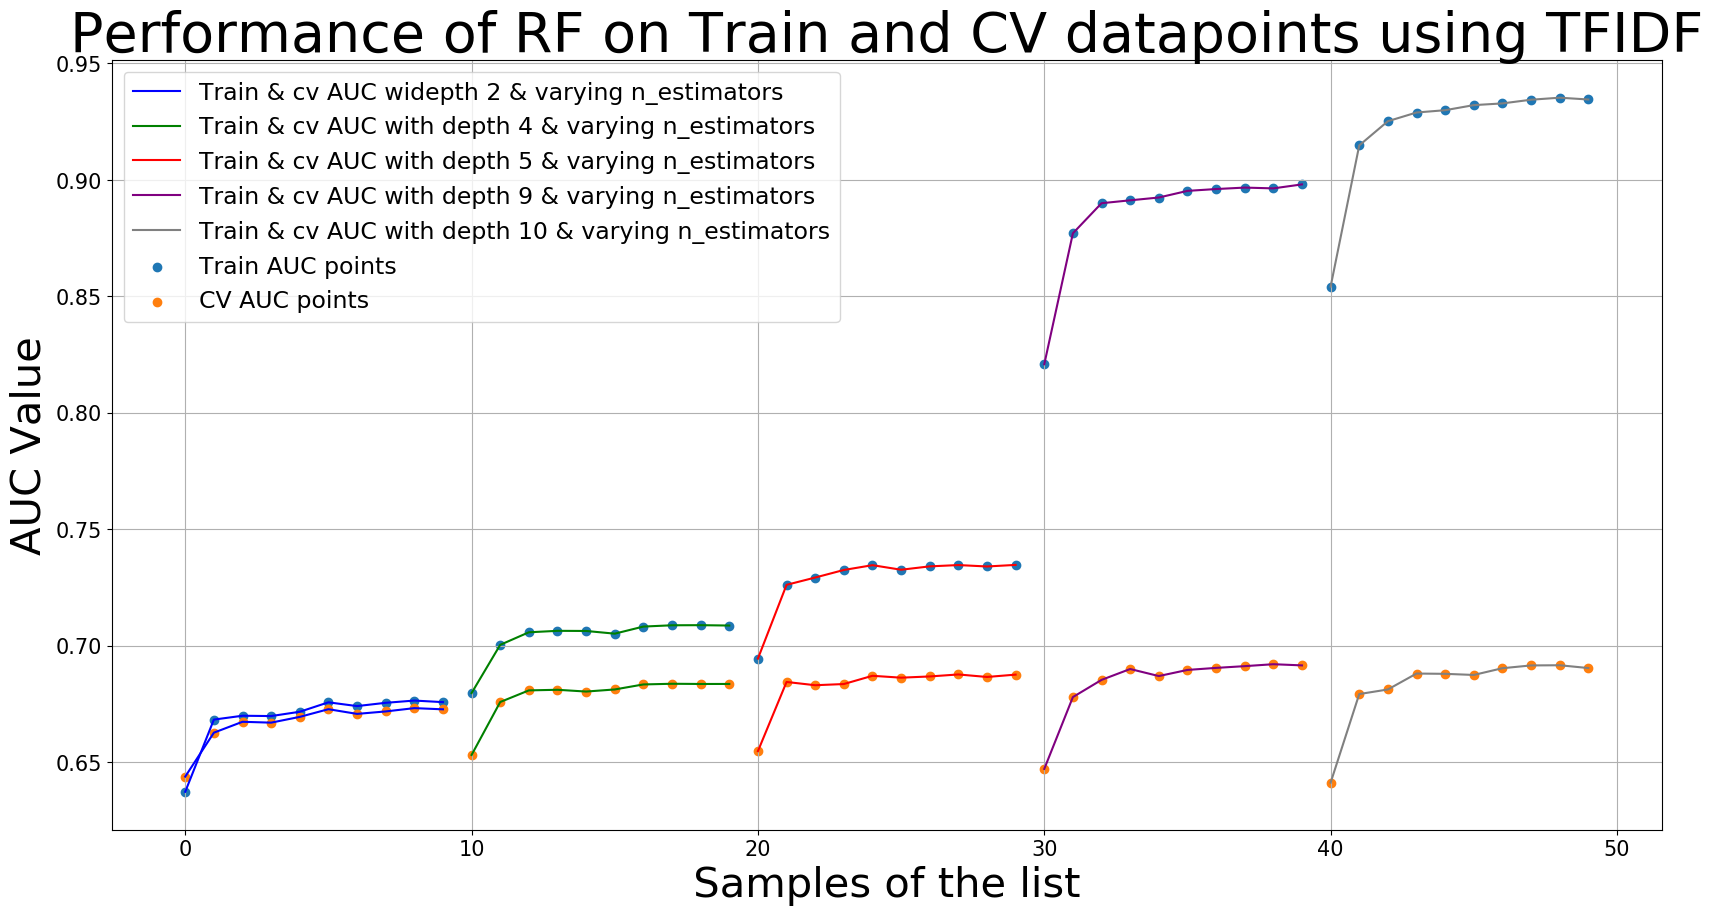

In [310]:
import math
k = [x for x in range(0,50)]
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.plot(k[0:10],train_auc_TFIDF_w2v[0:10], label='Train & cv AUC widepth 2 & varying n_estimators',color = "blue")
plt.plot(k[10:20],train_auc_TFIDF_w2v[10:20], label='Train & cv AUC with depth 4 & varying n_estimators',color = "green")
plt.plot(k[20:30],train_auc_TFIDF_w2v[20:30], label='Train & cv AUC with depth 5 & varying n_estimators',color = "red")
plt.plot(k[30:40],train_auc_TFIDF_w2v[30:40], label='Train & cv AUC with depth 9 & varying n_estimators',color = "purple")
plt.plot(k[40:50],train_auc_TFIDF_w2v[40:50], label='Train & cv AUC with depth 10 & varying n_estimators',color = "grey")

plt.plot(k[0:10],cv_auc_TFIDF_w2v[0:10],color = "blue")
plt.plot(k[10:20],cv_auc_TFIDF_w2v[10:20],color = "green")
plt.plot(k[20:30],cv_auc_TFIDF_w2v[20:30],color = "red")
plt.plot(k[30:40],cv_auc_TFIDF_w2v[30:40],color = "purple")
plt.plot(k[40:50],cv_auc_TFIDF_w2v[40:50],color = "grey")

plt.scatter(k,train_auc_TFIDF_w2v, label='Train AUC points')
plt.scatter(k,cv_auc_TFIDF_w2v, label='CV AUC points')
plt.tick_params(labelsize=15)
plt.legend(prop={'size': 17})
plt.xlabel(" Samples of the list ",fontsize = 30)
plt.ylabel("AUC Value",fontsize =30)
plt.title("Performance of RF on Train and CV datapoints using TFIDF",fontsize=40)
plt.grid()
plt.show()

## <font color='red'>Correction : The Above plot is the Performance of RF on Train and CV data Using TFIDF_W2V </font>

1) From the Plot obtained above, for each value of depth(2,4,5,9,10) hyperparameter and corresponding variation in number of estimators hyperparameter, the AUC values of Train data keep increasing but AUC values of CV data are stabilized after certain value of n_estimators is attained.

In [311]:
k = [x for x in range(0,50)]
for i in k:
    cv_auc_TFIDF_w2v[i]= round(cv_auc_TFIDF_w2v[i],3)

In [312]:
import numpy as np
d4 = [cv_auc_TFIDF_w2v[0:10],cv_auc_TFIDF_w2v[10:20], cv_auc_TFIDF_w2v[20:30],cv_auc_TFIDF_w2v[30:40],cv_auc_TFIDF_w2v[40:50]]

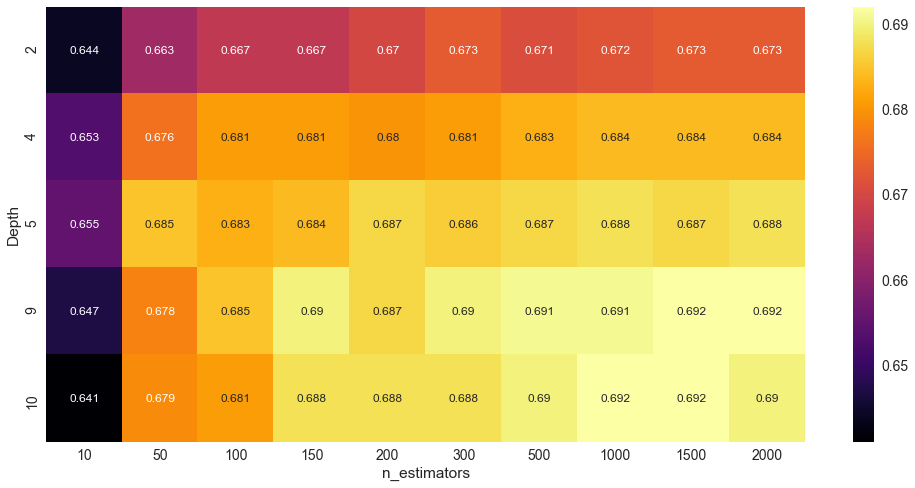

In [313]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
d4 = pd.DataFrame(d4, columns=[10, 50, 100, 150, 200, 300, 500, 1000,1500,2000], index =[2, 4, 5, 9, 10])
d4.index.name = 'Depth'
d4.columns.name = 'n_estimators'
plt.figure(figsize = (17,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(d4, cmap="inferno", annot=True,annot_kws={"size": 12},fmt='g')# font size

1) From the heatmap obtained above, it is compelling to test the data with a depth of 9 and n_estimators to be 500, although there is an increase in the value by 0.01 with same depth(9) and increase in n_estimators(1500) but this increase could lead to overfit on a unseen data.

2) In addition,the values seems to be stabilized in the vicinity of depth = 9 and n_estimator = 500.

3) The Overfit could result as the difference between the AUC scores of Train and CV data points is high. These results could seem interesting but the their performance on unseen or test data could be lower than anticipated.

###  Using Optimal Hyperparmeters on Test Data

In [323]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

clf = RandomForestClassifier(n_estimators = 500 , max_depth = 9)
clf.fit(L_train_Tfidf_avg_w2v, y_train)
y_train_pred = batch_predict(clf, L_train_Tfidf_avg_w2v)
y_test_pred = batch_predict(clf, L_test_Tfidf_avg_w2v)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

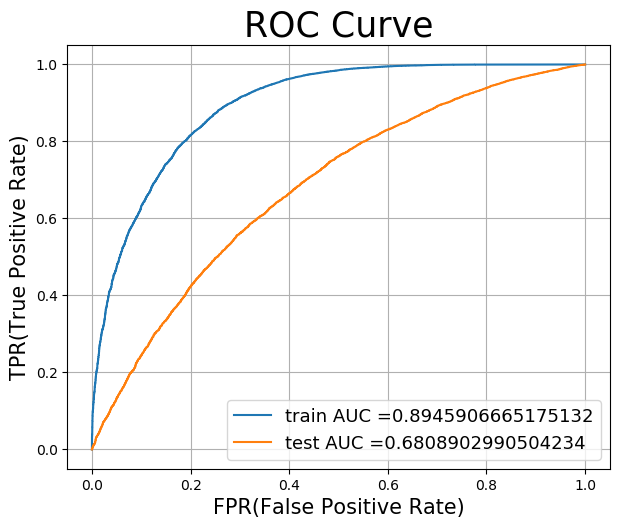

In [325]:
plt.figure(figsize=(7,5.5))
plt.style.use('default')
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))


plt.legend(prop={'size': 13})
plt.xlabel("FPR(False Positive Rate)",fontsize = 15)
plt.ylabel("TPR(True Positive Rate)",fontsize = 15)
plt.title("ROC Curve",fontsize= 25)
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.6557952113785651 for threshold 0.823


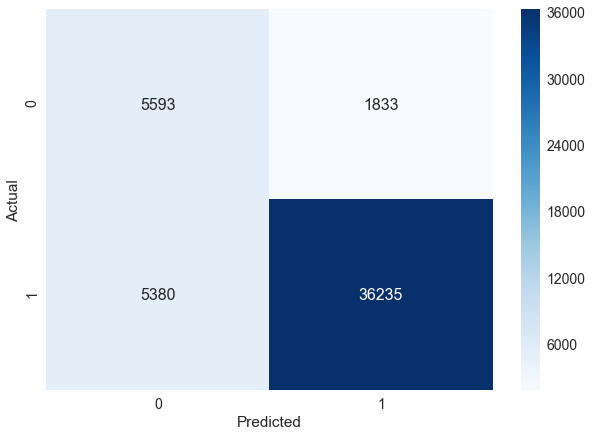

In [326]:
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
y_train_predicted = predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_train, y_train_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

the maximum value of tpr*(1-fpr) 0.4017411298592797 for threshold 0.819


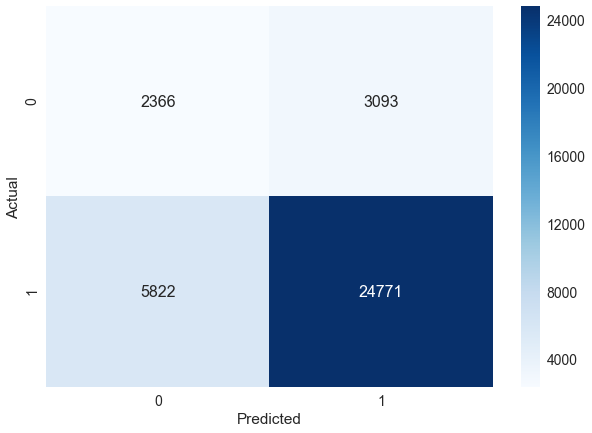

In [327]:
y_test_predicted = predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)
data = confusion_matrix(y_test, y_test_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

In [328]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.6557952113785651 for threshold 0.823
[[ 5593  1833]
 [ 5380 36235]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4017411298592797 for threshold 0.819
[[ 2366  3093]
 [ 5822 24771]]


### 8.8. Applying GBDT on TFIDF_W2V<font color='red'> SET 4</font>

In [311]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

train_auc_tfidf_w2v_2 = []
cv_auc_tfidf_w2v_2 = []

K = [10, 50, 100, 150, 200, 300, 500]
D = [2, 4, 5, 9]
for i in D:
    for j in K:
        clf = GradientBoostingClassifier(n_estimators = j,max_depth = i)
        clf.fit(L_train_Tfidf_avg_w2v, y_train)
      
        y_train_pred = batch_predict(clf, L_train_Tfidf_avg_w2v)
    
        y_cv_pred = batch_predict(clf, L_cv_Tfidf_avg_w2v)
        # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
        # not the predicted outputs        
        train_auc_tfidf_w2v_2.append(roc_auc_score(y_train,y_train_pred))
        cv_auc_tfidf_w2v_2.append(roc_auc_score(y_cv, y_cv_pred))
    print(i)

2
4
5
9


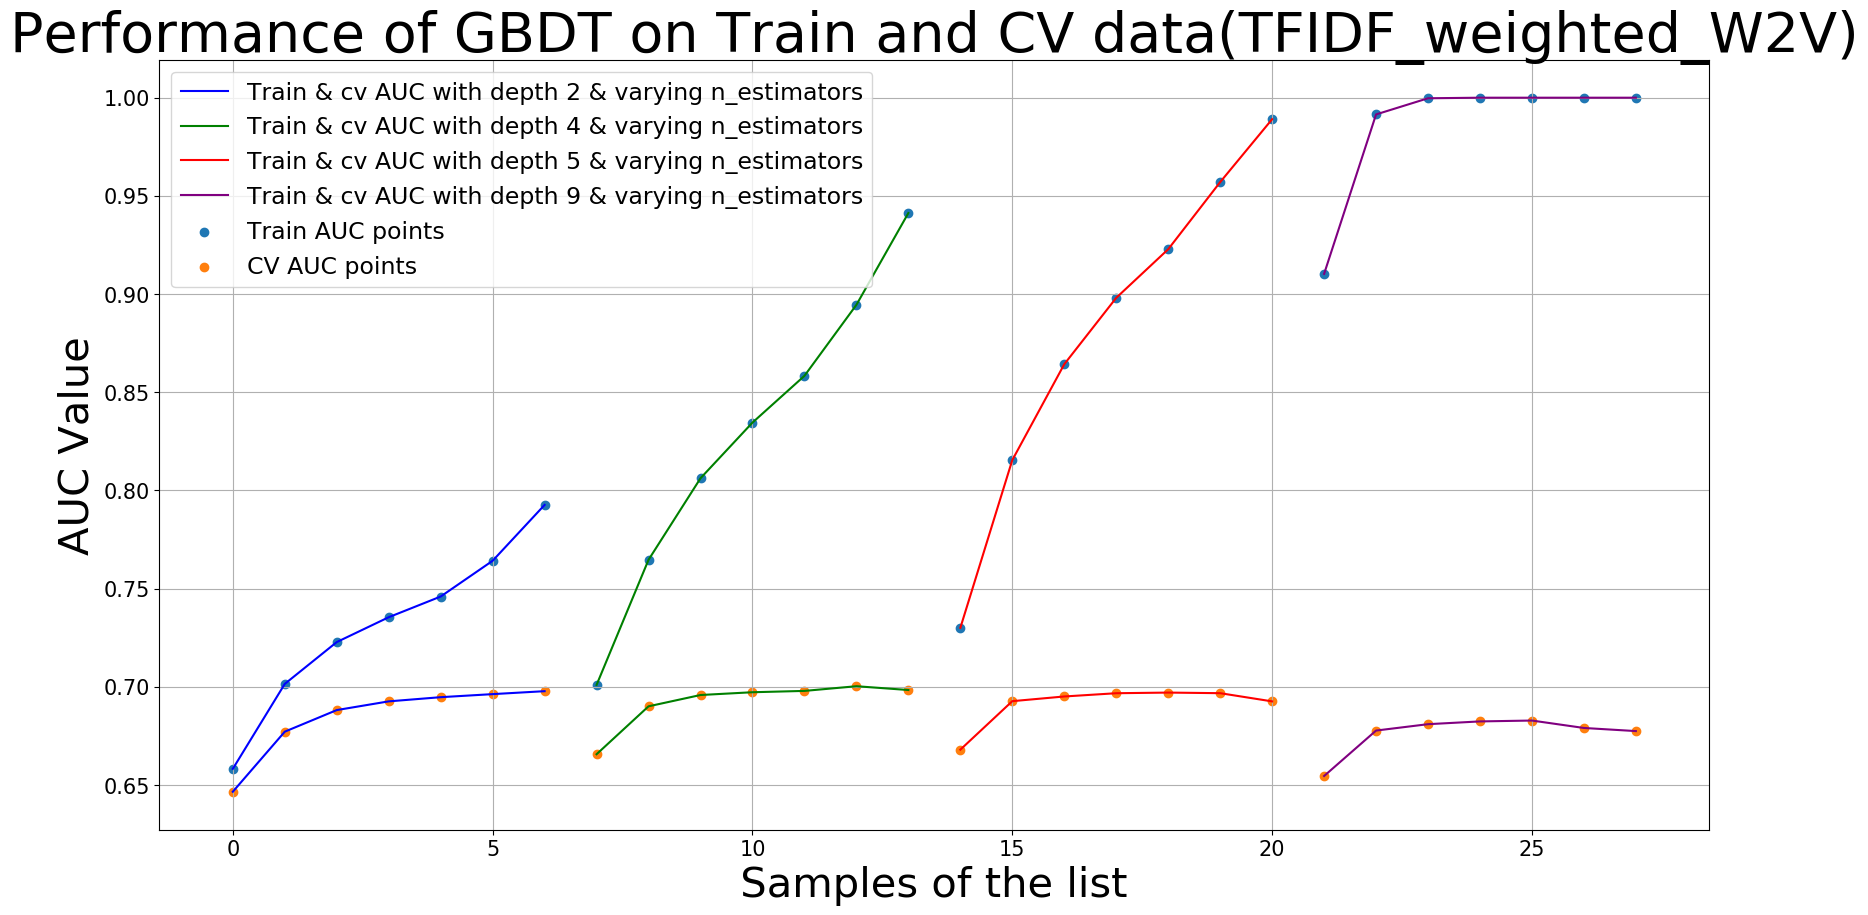

In [313]:
import math
k = [x for x in range(0,28)]
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.plot(k[0:7],train_auc_tfidf_w2v_2[0:7], label='Train & cv AUC with depth 2 & varying n_estimators',color = "blue")
plt.plot(k[7:14],train_auc_tfidf_w2v_2[7:14], label='Train & cv AUC with depth 4 & varying n_estimators',color = "green")
plt.plot(k[14:21],train_auc_tfidf_w2v_2[14:21], label='Train & cv AUC with depth 5 & varying n_estimators',color = "red")
plt.plot(k[21:28],train_auc_tfidf_w2v_2[21:28], label='Train & cv AUC with depth 9 & varying n_estimators',color = "purple")

plt.plot(k[0:7],cv_auc_tfidf_w2v_2[0:7],color = "blue")
plt.plot(k[7:14],cv_auc_tfidf_w2v_2[7:14],color = "green")
plt.plot(k[14:21],cv_auc_tfidf_w2v_2[14:21],color = "red")
plt.plot(k[21:28],cv_auc_tfidf_w2v_2[21:28],color = "purple")

plt.scatter(k,train_auc_tfidf_w2v_2, label='Train AUC points')
plt.scatter(k,cv_auc_tfidf_w2v_2, label='CV AUC points')
plt.tick_params(labelsize=15)
plt.legend(prop={'size': 17})
plt.xlabel(" Samples of the list ",fontsize = 30)
plt.ylabel("AUC Value",fontsize =30)
plt.title("Performance of GBDT on Train and CV data(TFIDF_weighted_W2V)",fontsize=40)
plt.grid()
plt.show()

1) From the Plot obtained above, for each value of depth(2,4,5,9,10) hyperparameter and corresponding variation in number of estimators hyperparameter, the AUC values of Train data keep increasing but AUC values of CV data are stabilized after certain value of n_estimators is attained.

In [314]:
k = [x for x in range(0,28)]
for i in k:
    cv_auc_tfidf_w2v_2[i]= round(cv_auc_tfidf_w2v_2[i],3)

In [315]:
d8 = [cv_auc_tfidf_w2v_2[0:7],cv_auc_tfidf_w2v_2[7:14], cv_auc_tfidf_w2v_2[14:21],cv_auc_tfidf_w2v_2[21:28]]

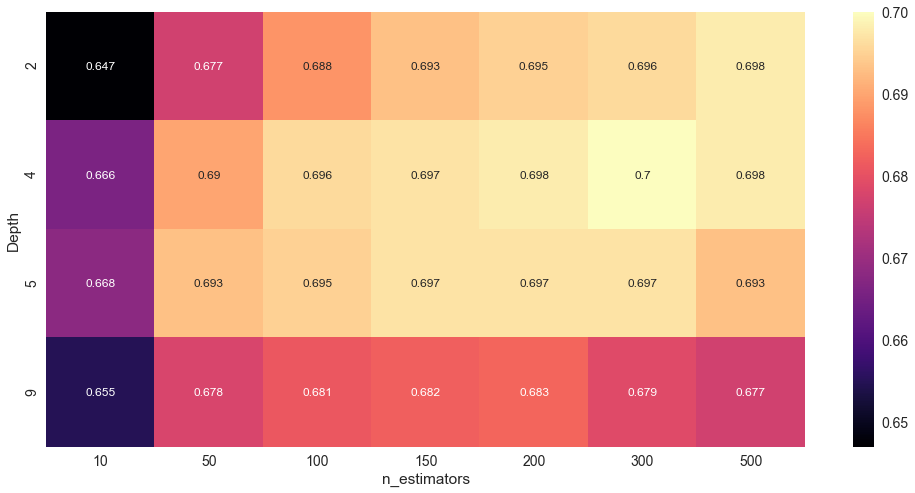

In [316]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
d8 = pd.DataFrame(d8, columns=[10, 50, 100, 150, 200, 300, 500], index =[2, 4, 5, 9])
d8.index.name = 'Depth'
d8.columns.name = 'n_estimators'
plt.figure(figsize = (17,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(d8, cmap="magma", annot=True,annot_kws={"size": 12},fmt='g')# font size

1) From the heatmap obtained above, it is compelling to test the data with a depth of 4 and n_estimators to be 300, which is the optimal values in the table.

2) In addition,the values seems to be stabilized in the vicinity of depth = 4 and n_estimator = 500.

3) The Overfit could result as the difference between the AUC scores of Train and CV data points is high. These results could seem interesting but the their performance on unseen or test data could be lower than anticipated.

In [317]:
clf = GradientBoostingClassifier(n_estimators = 300 , max_depth = 4)
clf.fit(L_train_Tfidf_avg_w2v, y_train)
y_train_pred = batch_predict(clf, L_train_Tfidf_avg_w2v)
y_test_pred = batch_predict
(clf, L_test_Tfidf_avg_w2v)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

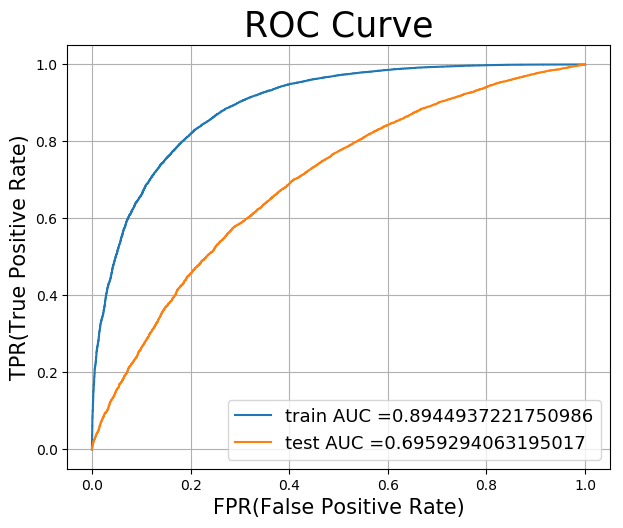

In [322]:
plt.figure(figsize=(7,5.5))
plt.style.use('default')
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))

plt.legend(prop={'size': 13})
plt.xlabel("FPR(False Positive Rate)",fontsize = 15)
plt.ylabel("TPR(True Positive Rate)",fontsize = 15)
plt.title("ROC Curve",fontsize= 25)
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.6574664860214439 for threshold 0.816


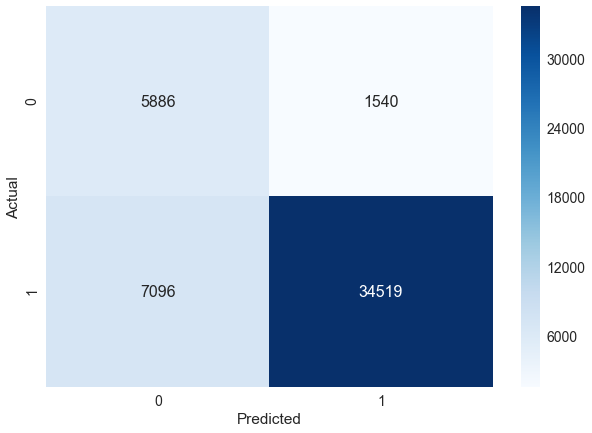

In [323]:
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
y_train_predicted = predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_train, y_train_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

the maximum value of tpr*(1-fpr) 0.4159697869768922 for threshold 0.786


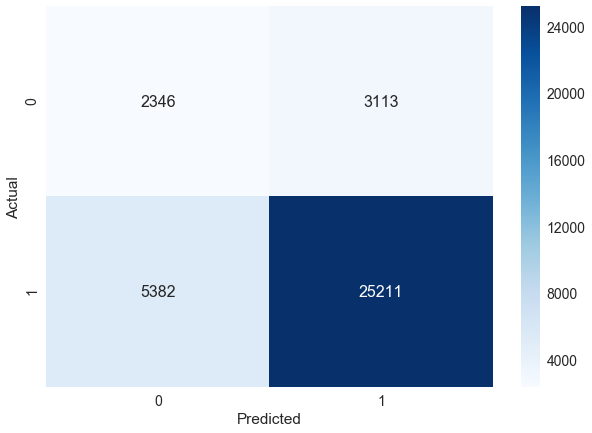

In [326]:
y_test_predicted = predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)
data = confusion_matrix(y_test, y_test_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

<h1>9. Conclusions</h1>

In [1]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Type of Vectorizer", "Optimal_depth","optimal_estimators", "Train_AUC","Test_AUC"]
x.add_row(["RF on BoW", 5,500,0.7552,0.6722])
x.add_row(["GBDT on BoW", 4,500, 0.897,0.7069])
x.add_row(["RF on TFIDF",5,500, 0.7498, 0.6673])
x.add_row(["GBDT on TFIDF", 4,300, 0.8773, 0.6945])
x.add_row(["RF on Avg_W2V",9,500, 0.8972, 0.6695])
x.add_row(["GBDT on Avg_W2V", 5,150, 0.8986, 0.6939])
x.add_row(["RF on TFIDF_W2V",9,500, 0.8945, 0.6808])
x.add_row(["GBDT on TFIDF_W2V",4,300, 0.8944, 0.6959])

print(x)

+--------------------+---------------+--------------------+-----------+----------+
| Type of Vectorizer | Optimal_depth | optimal_estimators | Train_AUC | Test_AUC |
+--------------------+---------------+--------------------+-----------+----------+
|     RF on BoW      |       5       |        500         |   0.7552  |  0.6722  |
|    GBDT on BoW     |       4       |        500         |   0.897   |  0.7069  |
|    RF on TFIDF     |       5       |        500         |   0.7498  |  0.6673  |
|   GBDT on TFIDF    |       4       |        300         |   0.8773  |  0.6945  |
|   RF on Avg_W2V    |       9       |        500         |   0.8972  |  0.6695  |
|  GBDT on Avg_W2V   |       5       |        150         |   0.8986  |  0.6939  |
|  RF on TFIDF_W2V   |       9       |        500         |   0.8945  |  0.6808  |
| GBDT on TFIDF_W2V  |       4       |        300         |   0.8944  |  0.6959  |
+--------------------+---------------+--------------------+-----------+----------+


1) From the results obtained above, GBDT using BoW, TFIDF , Avg_W2V and TFIDF weighted W2V have approximately same AuC Score   i.e 70% implying a better models for predicting decision boundary on an unseen data.  

2) It is fascinating that all the models using GBDT outperform Random Forest which is not typical as Random Forest is compared in parallel with XGBoost Model which is an updated version of GBDT.

2) From the consfusion matrix obtained in each of the implemented models, almost 80% of the test data were correctly classified as accepted which is the main aim of the problem statement.

3) The train and run time is are of all the models using GBDT above are higher.